Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv and Rose.csv

Please do perform the following questions on each of these two data sets separately.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Read the data as an appropriate Time Series data and plot the data.

# **Sparkling.csv**

In [11]:
df_sprk = pd.read_csv ("Sparkling.csv",parse_dates=True,squeeze=True)

squeeze will convert the data into a series data

In [12]:
df_sprk.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [13]:
df_sprk.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [3]:
df_sprk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [563]:
df_sprk.shape

(187, 2)

In [14]:
date_sprk=pd.date_range(start='1980-01',end = '1995-08',freq = 'M')

Here the wine saling is based on monthly data. So we have used frequency as 'M' which convert the date as last date of each month which will represent the data as for whole month.

In [15]:
date_sprk

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [16]:
df_sprk['TimeStamp']=pd.DataFrame(date_sprk,columns=['YearMonth'])

In [17]:
df_sprk.tail()

YearMonth  Sparkling  TimeStamp
182   1995-03       1897 1995-03-31
183   1995-04       1862 1995-04-30
184   1995-05       1670 1995-05-31
185   1995-06       1688 1995-06-30
186   1995-07       2031 1995-07-31

In [18]:
df_sprk.set_index(keys = 'TimeStamp',drop=True,inplace=True)
df_sprk.head()

YearMonth  Sparkling
TimeStamp                      
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [19]:
df_sprk.drop(labels='YearMonth',inplace=True,axis=1)
df_sprk.head()

Sparkling
TimeStamp            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [20]:
df_sprk.duplicated().sum()

11

In [21]:
df_sprk.isnull().sum()

Sparkling    0
dtype: int64

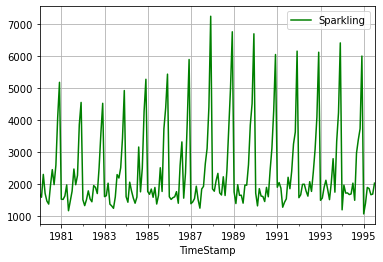

In [22]:
df_sprk.plot(color='green');
plt.grid();

**We see there is presence of seasonality with an uniform Trend. We will explore more in coming analysis to understand the seasonality pattern**

# **Rose.csv**

In [23]:
df_rose = pd.read_csv ("Rose.csv",parse_dates=True,squeeze=True)

In [24]:
df_rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [25]:
df_rose.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [26]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [27]:
df_rose.shape

(187, 2)

In [29]:
date_rose=pd.date_range(start='1980-01', end = '1995-08', freq = 'M')

In [30]:
date_rose

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [31]:
df_rose['TimeStamp']=pd.DataFrame(date_rose,columns=['YearMonth'])

In [32]:
df_rose.tail()

YearMonth  Rose  TimeStamp
182   1995-03  45.0 1995-03-31
183   1995-04  52.0 1995-04-30
184   1995-05  28.0 1995-05-31
185   1995-06  40.0 1995-06-30
186   1995-07  62.0 1995-07-31

In [33]:
df_rose.set_index(keys='TimeStamp',drop=True, inplace=True)
df_rose.head()

YearMonth   Rose
TimeStamp                  
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [34]:
df_rose.drop(labels='YearMonth',inplace=True,axis=1)
df_rose.head()

Rose
TimeStamp        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [35]:
df_rose.isna().sum()

Rose    2
dtype: int64

In [36]:
df_rose.duplicated().sum()

90

We will treat the missing value before ploting the data

In [37]:
df_rose[df_rose['Rose'].isna()]

Rose
TimeStamp       
1994-07-31   NaN
1994-08-31   NaN

In [38]:
df_rose.interpolate(inplace=True)

In [39]:
df_rose[df_rose['Rose'].isna()]

Empty DataFrame
Columns: [Rose]
Index: []

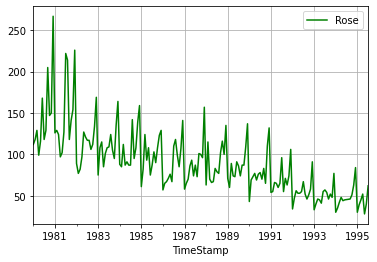

In [40]:
df_rose.plot(color = 'green');
plt.grid()

**We can see there is a Trend with seasonality pattern. We will explore more on the patterns in coming analysis**

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

# **EDA of Sparkling.csv**

In [41]:
df_sprk.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

**Based on Yearly sales of Wine**

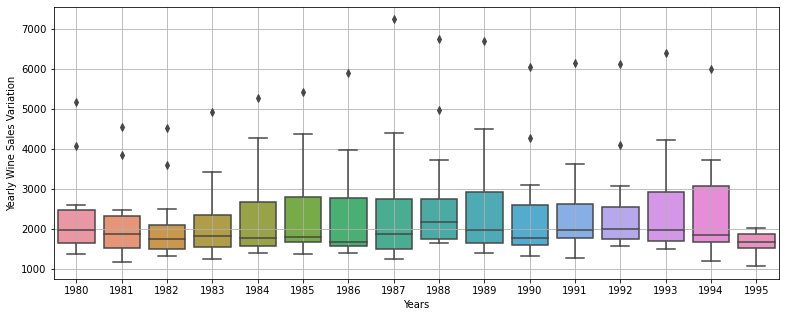

In [334]:
plt.figure(figsize=(13,5))
sns.boxplot(x=df_sprk.index.year,y=df_sprk['Sparkling'],data=df_sprk)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales Variation');

There is outliers in almost all the years except 1995. The boxplots also indicates there is uniform trend but seasonality present in the data set.

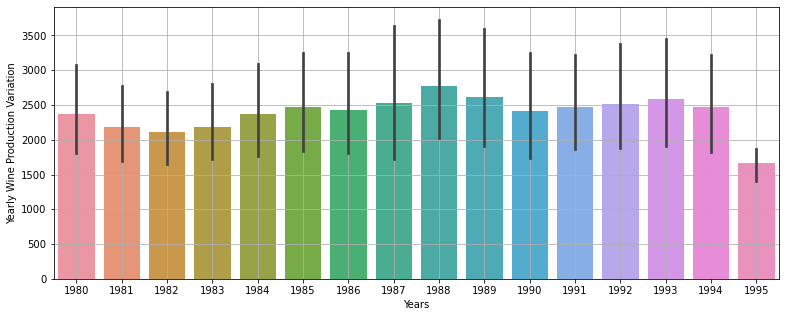

In [335]:
plt.figure(figsize=(13,5))
sns.barplot(x=df_sprk.index.year,y=df_sprk['Sparkling'],data=df_sprk)
plt.grid()
plt.xlabel('Years');
plt.ylabel('Yearly Wine Production Variation');

More number of Wine sales happened on 1988. And less happened on 1995. This is probably in 1995, data is present only up to July.

**Based on Monthly sale of Wine taking all years into account**

Text(0, 0.5, 'Monthly Wine Sale')

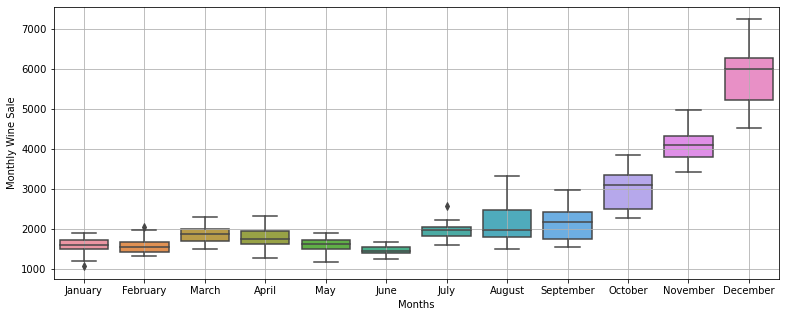

In [336]:
plt.figure(figsize=(13,5))
sns.boxplot(x=df_sprk.index.month_name(),y=df_sprk['Sparkling'],data=df_sprk)
plt.grid();
plt.xlabel('Months')
plt.ylabel('Monthly Wine Sale')


•	There is outliers in January, February and July month. Also there is a trend can be seen from September to December month.

•	December is having highest wine sale, whereas June is having lowest sale.


Text(0, 0.5, 'Monthly Wine Sale')

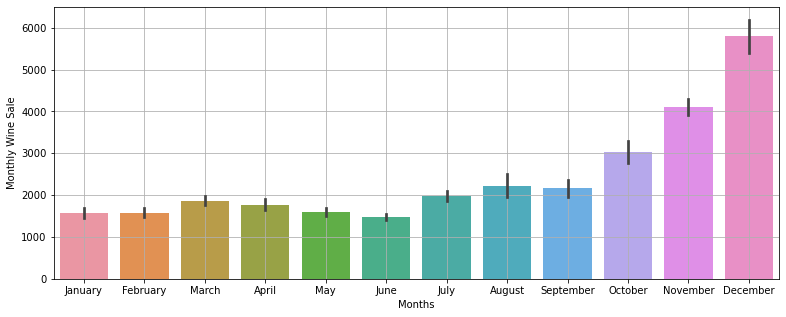

In [338]:
plt.figure(figsize=(13,5))
sns.barplot(x=df_sprk.index.month_name(),y=df_sprk['Sparkling'],data=df_sprk)
plt.grid();
plt.xlabel('Months')
plt.ylabel('Monthly Wine Sale')

•	More number of sales happened on the month of December and less in June. From January to March sale is increasing, April to June decreasing, July, August again increasing, From September to December one more increased trend.

•	It seems during winter time and the festive season in December it might have more sale


**Month plot of a given time series**

<Figure size 1584x576 with 0 Axes>

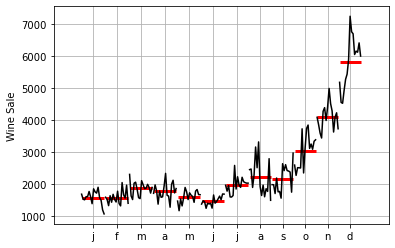

In [346]:
from statsmodels.graphics.tsaplots import month_plot

plt.figure(figsize=(22,8))

month_plot(df_sprk,ylabel='Wine Sale')
plt.grid();

As we saw earlier in barplot, here also can see wine sales is higher in december. And it started getting higher from October. as Median(Red mark) is higher in these months.(Median shows the seasonality)

**Time series according to different month in each year**

In [55]:
Yearly_sales_acorss_months = pd.pivot_table(df_sprk, values = 'Sparkling',
                                            columns = df_sprk.index.month, index= df_sprk.index.year)

In [56]:
Yearly_sales_acorss_months

TimeStamp      1       2       3       4       5       6       7       8   \
TimeStamp                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

TimeStamp      9       10      11      12  
TimeStamp                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

**Line Plot**

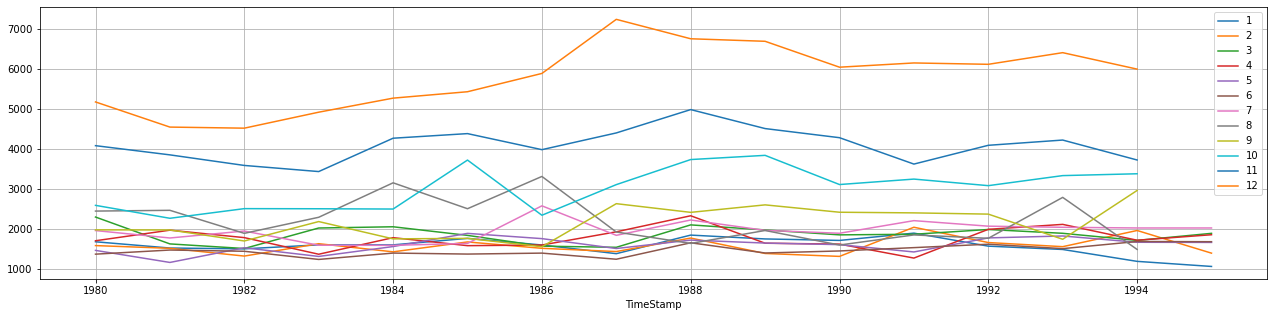

In [58]:
fig,ax = plt.subplots(figsize=(22,5))
Yearly_sales_acorss_months.plot(ax=ax)
plt.grid()
plt.legend(loc='best');

•	1 to 12 represents the month from January to December. December is having highest production throughout all the years followed by November being the 2nd highest production rate month throughout all the years.

•	Coming to 3rd highest sale, October and August is having up and down in some years. Like some years is having August highest and some having October.


**Monthly observation into quaterly and yearly format using "Resampling"**

**Yearly plot**

In [61]:
sprk_yearly_sum = df_sprk.resample('A').sum()

In [62]:
sprk_yearly_sum.head()

Sparkling
TimeStamp            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

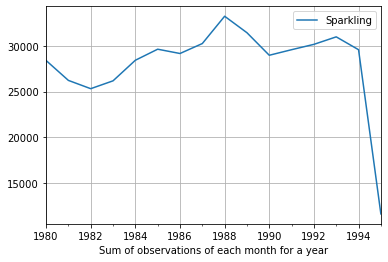

In [63]:
sprk_yearly_sum.plot();
plt.grid();
plt.xlabel('Sum of observations of each month for a year');

There is a sudden fall in 1995 because we do not have all months data available for 1995. 

The highest sale happened on 1988 whereas the lowest is in 1982.

**Mean of observations of each year**

In [64]:
sprk_year_mean = df_sprk.resample('Y').mean()

In [65]:
sprk_year_mean.head()

Sparkling
TimeStamp              
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

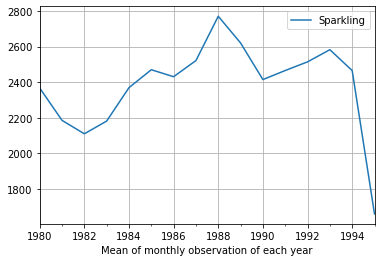

In [66]:
sprk_year_mean.plot()
plt.grid()
plt.xlabel('Mean of monthly observation of each year');

**Quaterly plot**

In [69]:
sprk_quater_sum = df_sprk.resample('Q').sum()

In [70]:
sprk_quater_sum.head()

Sparkling
TimeStamp            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

Text(0.5, 0, 'Sum of observations for each month in each quarter')

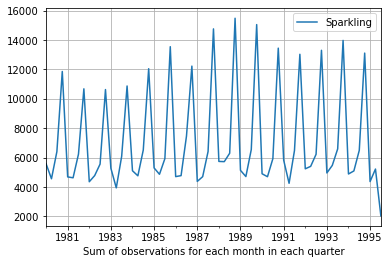

In [71]:
sprk_quater_sum.plot()
plt.grid()
plt.xlabel('Sum of observations for each month in each quarter')

**Mean of monthly observations for each quarter**

In [72]:
sprk_quarter_mean = df_sprk.resample('Q').mean()

In [73]:
sprk_quarter_mean.head()

Sparkling
TimeStamp              
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

Text(0.5, 0, 'Mean of monthly observations for each quarter')

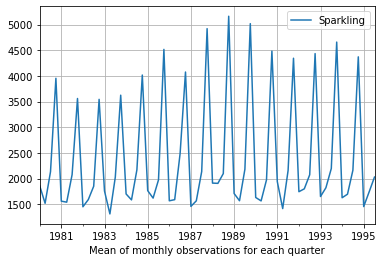

In [74]:
sprk_quarter_mean.plot()
plt.grid()
plt.xlabel('Mean of monthly observations for each quarter')

**Daily Data**

In [75]:
sprk_daily_sum = df_sprk.resample('D').sum()

In [76]:
sprk_daily_sum.head()

Sparkling
TimeStamp            
1980-01-31       1686
1980-02-01          0
1980-02-02          0
1980-02-03          0
1980-02-04          0

Text(0.5, 0, 'Daily Observations')

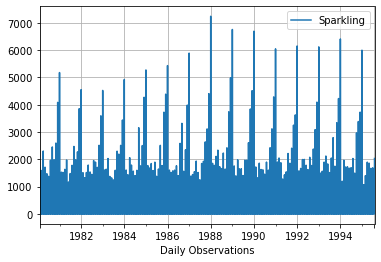

In [77]:
sprk_daily_sum.plot()
plt.grid()
plt.xlabel('Daily Observations')

**Plot to understand data for a decade**

In [80]:
sprk_decade_sum = df_sprk.resample('10Y').sum()

In [81]:
sprk_decade_sum.head()

Sparkling
TimeStamp            
1980-12-31      28406
1990-12-31     288893
2000-12-31     131953

Text(0.5, 0, 'Observation for each decade')

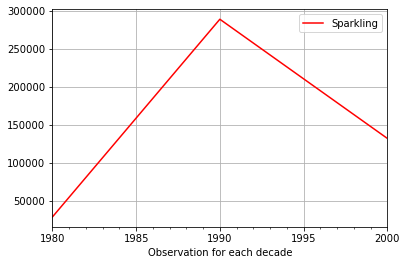

In [83]:
sprk_decade_sum.plot(color='red')
plt.grid()
plt.xlabel('Observation for each decade')

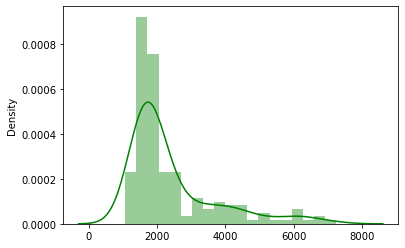

In [85]:
sns.distplot(df_sprk,color='green');

**Empirical Cumulative Distribution**

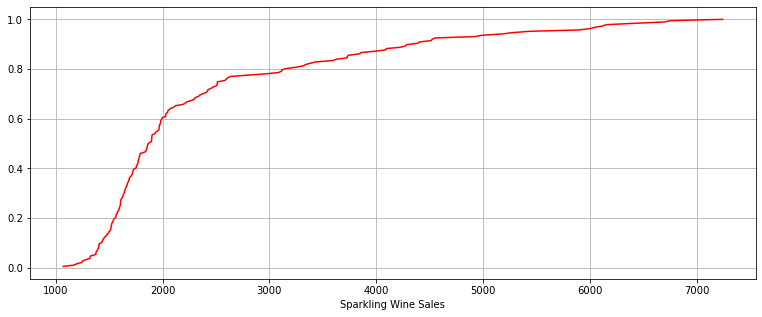

In [370]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (13, 5))
cdf = ECDF(df_sprk['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color='red');
plt.grid()
plt.xlabel('Sparkling Wine Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

Autocorrelation Plot

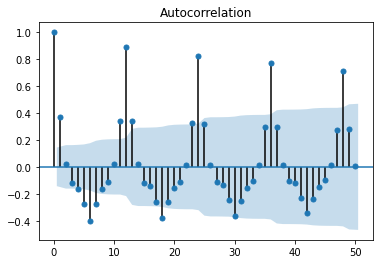

In [353]:
plot_acf(df_sprk['Sparkling'],lags=50)
plt.show()

When data are seasonal, the autocorrelations will be larger for the seasonal lags

lag 12 is higher than for the other lags. This is due to the seasonal pattern in the data


**Inference:**

1. Yearly data is not able to show seasonality present in the data set. Its showig only the trend. However, it does not have trend as well.

2. Quaterly data is showing the exact seasonality present. It means data is changing based on months/quarter.

3. From the daily data, it is difficult to analyze as there are zero's present in data set. So from this data cannot analyze usin daily observations.

4. From the decade plot it can seen that there is a increase trend up to 1990 and after that there is another trend which is towards down. So trend is changing in every 10 years. 

5. Data is skewed

6. We found yearly trend and monthly seasonality in the data set.

# **Decomposition**

1. There are four componenets in decomposition.

   -- Observed Data
   
   -- Trend (Filter out trend in the data)
   
   -- Sesonality (Filter out seasonality in the data)
   
   -- Residual (After taking up trend and seasonality what ever is remaining will capture as residual which is known as "White Noise")
   
2. Decompsition has two methods:

  -- Additive (Sesonality is constant and trend is increasing)
  
Trend is calculated by past 6 months of data. Like on the 7th month it has 6months of data so it will take the average of 6months and put that on the value for 7th month Like wise it calculates all others. And first 6 month values will alwyas be Null.

Seasonality is calculated by the minus of average of 6months of data and the original time series data of that month. And than for every month it will take one average value. (Ex: For all January month one average) and that is known as sesonality of the month.

Residual is calculated as original - (trend + sesonality). What ever is left over is known as residual which is a white noise.
  
  -- Multiplicative (Increase in magnitude of Sesonality on time)
  
It is always trend multiply Seasonality  multiply Residual





# **Sparkling.csv**

**Aditive Modelling**

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

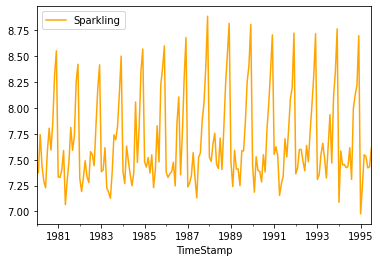

In [21]:
np.log(df_sprk).plot(color='orange')

Log will remove the multiplicative seasonality if anything is present. So if we are using log function than we should always use Additive in real time. But here we are using both just for touching up both the concepts.

**Here Seasonal variation is mostly constant therefore we can choose to have additive model**

In [22]:
sprk_decomposition = seasonal_decompose(df_sprk,model='additive')

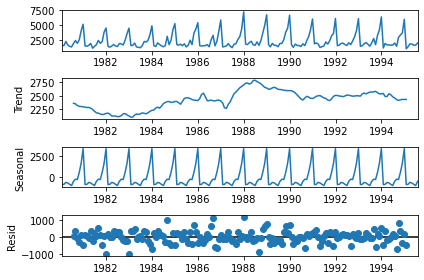

In [23]:
sprk_decomposition.plot();

•	We don’t see a good trend but there is seasonality.

•	Seasonality is consistently repeating at the same frequency.

•	In residual the points do not have any strong error pattern though those are not inline.


In [23]:
trend = sprk_decomposition.trend
seasonality = sprk_decomposition.seasonal
residual = sprk_decomposition.resid

In [95]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 TimeStamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 TimeStamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 TimeStamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290


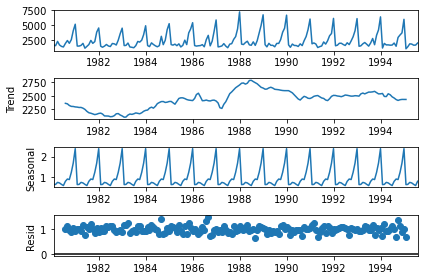

In [339]:
sprk_decomposition_m = seasonal_decompose(df_sprk,model='multiplicative')
sprk_decomposition_m.plot();

Now we can see that the error components in Residual are now some how inlined

In [97]:
trend_m = sprk_decomposition_m.trend
seasonality_m = sprk_decomposition_m.seasonal
residual_m = sprk_decomposition_m.resid

In [98]:
print('Trend','\n',trend_m.head(12),'\n')
print('Seasonality','\n',seasonality_m.head(12),'\n')
print('Residual','\n',residual_m.head(12),'\n')

Trend 
 TimeStamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 TimeStamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 TimeStamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: resi

**If any point of time if it is required to deaseasonalizing the data we can simply add the trend and the residual**

In [26]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(10)

TimeStamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2431.502265
1980-08-31    2667.332821
1980-09-30    2238.677265
1980-10-31    1996.230043
dtype: float64

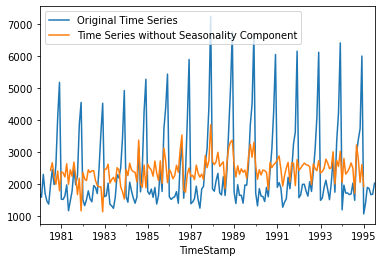

In [27]:
df_sprk.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

The blue lines are the orginal data and orange is without sesonality.

# **EDA of Rose.csv**

In [103]:
df_rose.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

**Based on yearly production of Wine**

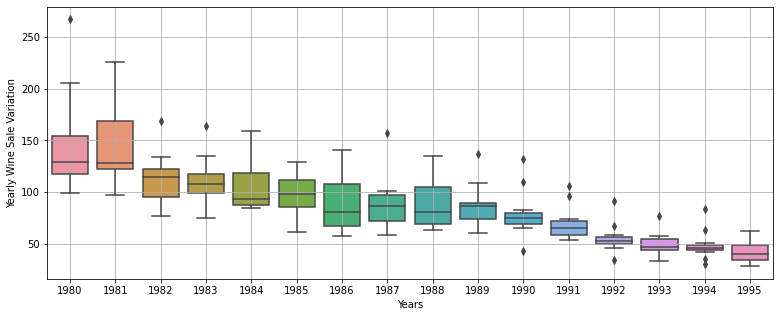

In [340]:
plt.figure(figsize=(13,5))
sns.boxplot(x=df_rose.index.year,y=df_rose['Rose'],data=df_rose)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sale Variation');

There is outlier present in 1982, 1983, 1987, 1989, 1990, 1991, 1992, 1993 and 1994. 

There is aclear trend as well. Highest number os wine sale has happened in 1981

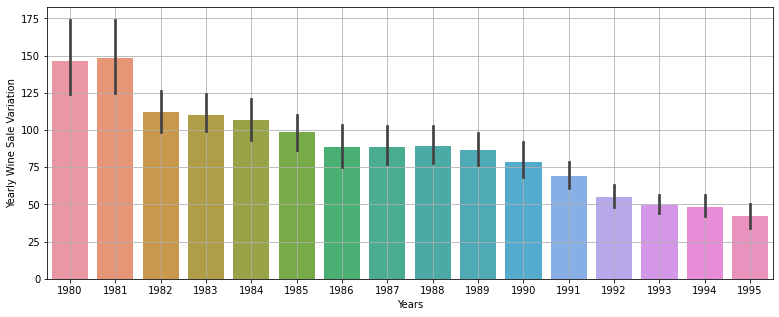

In [341]:
plt.figure(figsize=(13,5))
sns.barplot(x=df_rose.index.year,y=df_rose['Rose'],data=df_rose)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sale Variation');

•	Highest number of wine sales happened on 1981 followed by 2nd highest in 1980 and less number of sales shows for 1995 because it has data only up to July.

•	So can say 1994 has the lowest wine sale.


**Based on Monthly Sale of Wine taking all years into account**

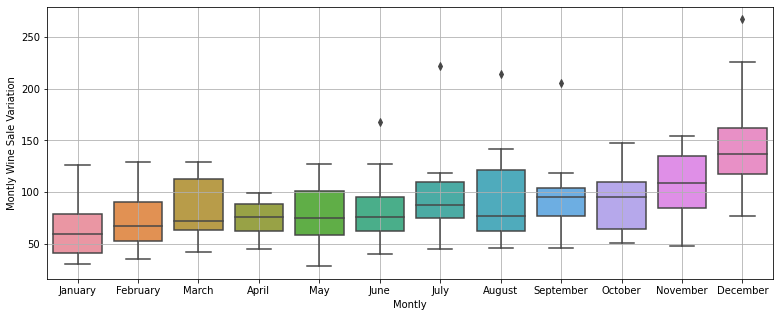

In [342]:
plt.figure(figsize=(13,5))
sns.boxplot(x=df_rose.index.month_name(),y=df_rose['Rose'],data=df_rose)
plt.grid();
plt.xlabel('Montly');
plt.ylabel('Montly Wine Sale Variation');

•	Monthly wine production sale is highest in December. The lowest seems to be in the month of January.

•	There are outliers in June, July, August, September and December month.


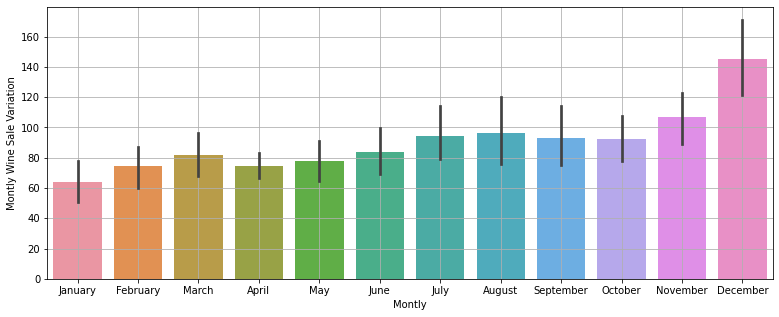

In [343]:
plt.figure(figsize=(13,5))
sns.barplot(x=df_rose.index.month_name(),y=df_rose['Rose'],data=df_rose)
plt.grid();
plt.xlabel('Montly');
plt.ylabel('Montly Wine Sale Variation');

Highest number of monthly wine sales happened on December and less on january

**Month plot for a given Time Series**

<Figure size 1584x576 with 0 Axes>

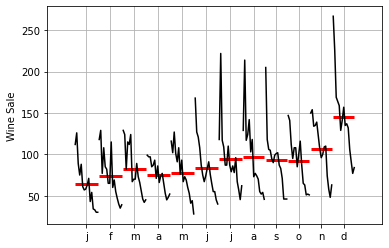

In [347]:
plt.figure(figsize=(22,8))

month_plot(df_rose,ylabel='Wine Sale')
plt.grid();

Can see in December wine sale is high. Seosnality is less but there is trend

**Plot Time Series according to different month in a different year**

In [109]:
Yearly_sales_acorss_months = pd.pivot_table(df_rose, values = 'Rose',
                                            columns = df_rose.index.month, index= df_rose.index.year)

In [110]:
Yearly_sales_acorss_months

TimeStamp     1      2      3     4      5      6           7           8   \
TimeStamp                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

TimeStamp     9      10     11     12  
TimeStamp                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

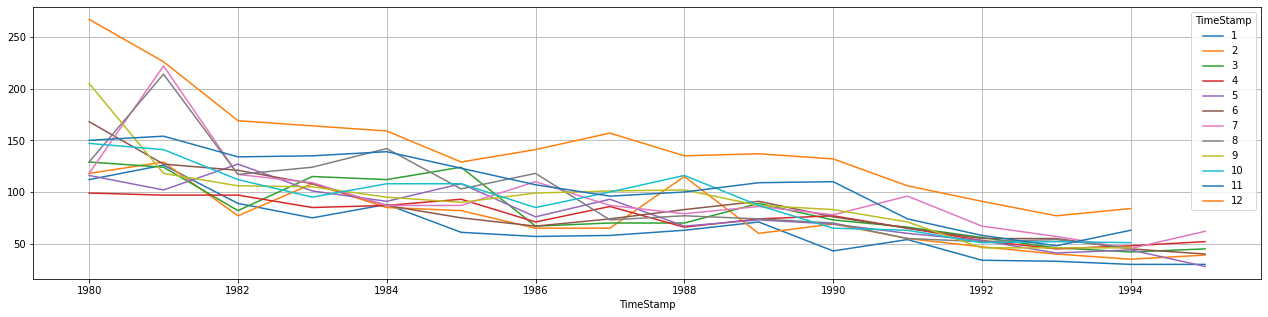

In [111]:
fig,ax = plt.subplots(figsize=(22,5))
Yearly_sales_acorss_months.plot(ax=ax)
plt.grid()

Clearly December has highest sale. And January has lowest. However in some of the year February or March is having lowest sale as well.

**Monthly Observation into Quarterly and Yearly format**

**Yearly plot**

In [112]:
rose_yearly_sum = df_rose.resample('A').sum()

Text(0.5, 0, 'Sum of observations of each month for a year')

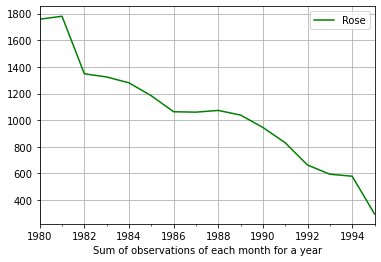

In [114]:
rose_yearly_sum.plot(color='green');
plt.grid();
plt.xlabel('Sum of observations of each month for a year')

**Mean Observation of each year**

In [115]:
rose_year_mean = df_rose.resample('Y').mean()

In [116]:
rose_year_mean.plot();
plt.grid();
plt.xlabel('Mean of observations of each month for a year')

Text(0.5, 0, 'Mean of observations of each month for a year')

**Quarterly Plot**

In [117]:
rose_quater_sum = df_rose.resample('Q').sum()

Text(0.5, 0, 'Sum of observations of each month for a quarter')

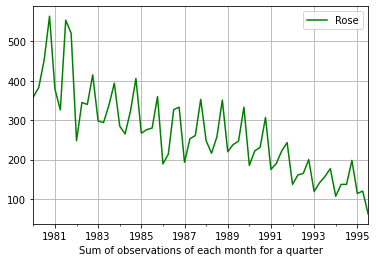

In [118]:
rose_quater_sum.plot(color='green');
plt.grid();
plt.xlabel('Sum of observations of each month for a quarter')

**Mean Observation of each quarter**

In [120]:
rose_Quarter_mean = df_rose.resample('Q').mean()

In [121]:
rose_Quarter_mean.plot();
plt.grid();
plt.xlabel('Mean of observations of each month for a quarter')

Text(0.5, 0, 'Mean of observations of each month for a quarter')

**Daily Data**

In [122]:
rose_daily_sum = df_rose.resample('D').sum()

Text(0.5, 0, 'Daily Observations')

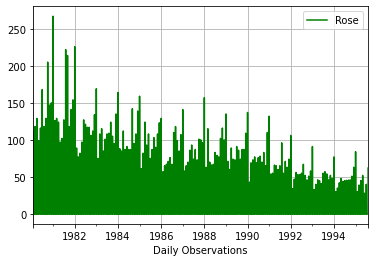

In [123]:
rose_daily_sum.plot(color='green')
plt.grid()
plt.xlabel('Daily Observations')

**Undestanding data for each decade**

In [125]:
rose_decade_sum = df_rose.resample('10Y').sum()

In [127]:
rose_decade_sum.plot(color='red')
plt.grid()
plt.xlabel('Observation of each decade')

Text(0.5, 0, 'Observation of each decade')

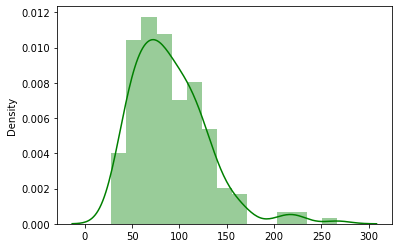

In [128]:
sns.distplot(df_rose,color='green');

**Empirical Cumulative Distribution**

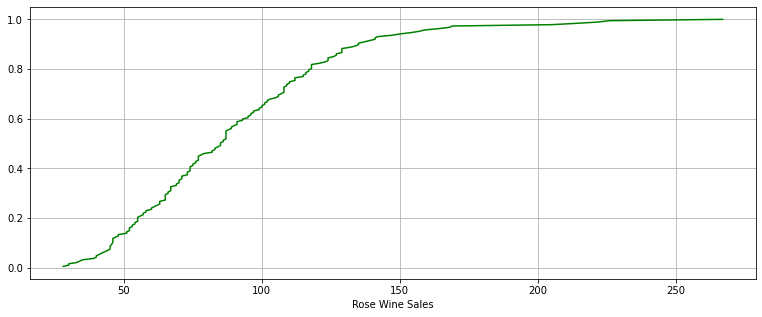

In [372]:
plt.figure(figsize = (13, 5))
cdf = ECDF(df_rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color='green');
plt.grid()
plt.xlabel('Rose Wine Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

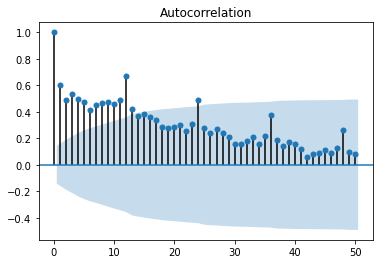

In [355]:
plot_acf(df_rose['Rose'],lags=50)
plt.show()

•	When data have a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in size. So the ACF of trended time series tend to have positive values that slowly decrease as the lags increase.

•	When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal frequency) than for other lags.

•	As data is both trended and seasonal, we see a combination of these effects.


**Inference**

Yearly data is not able to show seasonality present in the data set. However, it is showing the good amount of trend available.

Quaterly data is showing the exact seasonality present as well as the trend it has.

From the daily data, cannot analyze as there are zero data for daily dates. 

From the decade plot it can seen that there is a increase trend up to 1990 and after that there is another trend which is towards down. So trend is changing in every 10 years.

Data is looking like little bit skewed.

Data is representing yearly trend and monthly seasonality



# **Decomposition of Rose.csv**

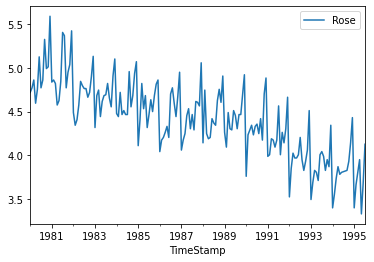

In [28]:
np.log(df_rose).plot()

**Here also seasonality is constant so we will choose to build additive**

In [29]:
rose_decomposition = seasonal_decompose(df_rose,model='additive')

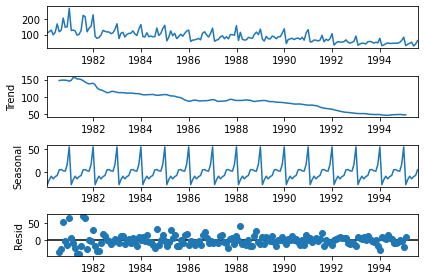

In [30]:
rose_decomposition.plot();

There is a good trend present. and consistently repeating seasonality at the same frequency

In [32]:
trend = rose_decomposition.trend
seasonality = rose_decomposition.seasonal
residual = rose_decomposition.resid

In [33]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 TimeStamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 TimeStamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 TimeStamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16142

Can check Multiplicative as well.

In [34]:
rose_decomposition_m = seasonal_decompose(df_rose,model='multiplicative')

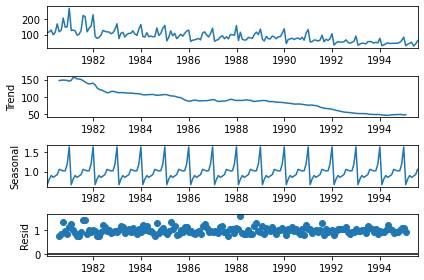

In [35]:
rose_decomposition_m.plot();

In [136]:
trend_m = rose_decomposition_m.trend
seasonality_m = rose_decomposition_m.seasonal
residual_m = rose_decomposition_m.resid

In [137]:
print('Trend','\n',trend_m.head(12),'\n')
print('Seasonality','\n',seasonality_m.head(12),'\n')
print('Residual','\n',residual_m.head(12),'\n')

Trend 
 TimeStamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 TimeStamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 TimeStamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype: fl

**Deasesonalizing the data set by removing seasonality from the data which can show how much sesoality has been captured**

In [36]:
deaseasonalized_ts = trend + seasonality
deaseasonalized_ts.head(10)

TimeStamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    151.980241
1980-08-31    153.624686
1980-09-30    151.149686
1980-10-31    149.955241
dtype: float64

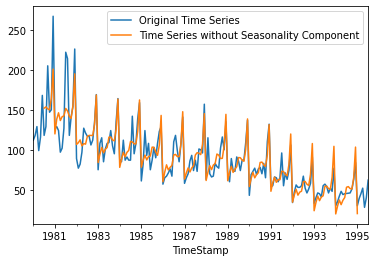

In [37]:
df_rose.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

Blue is the original data and orange shows time series without seasonality.

# 3. Split the data into training and test. The test data should start in 1991.

We have used train data set where year is smaller than 1991. And test 1991 and above.

This is how we have divided the train and test data set.

# **Sparkling.csv**

In [42]:
train_sprk = df_sprk[df_sprk.index.year < 1991]
test_sprk = df_sprk[df_sprk.index.year >= 1991]

In [39]:
train_sprk.shape

(132, 1)

In [19]:
test_sprk.shape

(55, 1)

In [21]:
train_sprk.head()

Sparkling
TimeStamp            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [25]:
test_sprk.head()

Sparkling
TimeStamp            
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [43]:
train_sprk['Sparkling'].plot(figsize=(13,5), fontsize=10)
test_sprk['Sparkling'].plot(figsize=(13,5), fontsize=10)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# **Rose.csv**

In [44]:
train_rose = df_rose[df_rose.index.year < 1991]
test_rose = df_rose[df_rose.index.year >= 1991]

In [42]:
train_rose.shape

(132, 1)

In [43]:
test_rose.shape

(55, 1)

In [44]:
train_rose.head()

Rose
TimeStamp        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [25]:
test_rose.head()

Rose
TimeStamp       
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

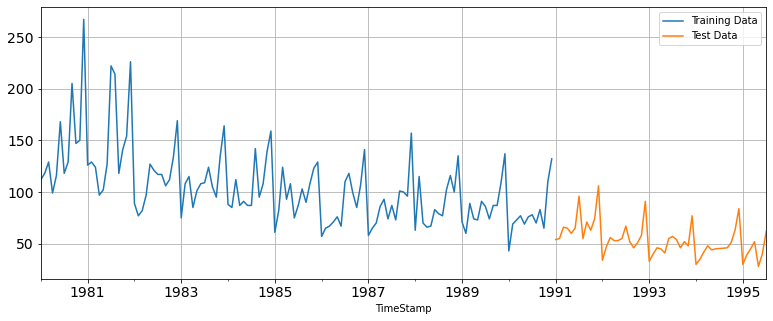

In [45]:
train_rose['Rose'].plot(figsize=(13,5), fontsize=14)
test_rose['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

**Here as asked I have used Linear regression, Naive Forecast and Simple Average models and smoothing model such as Simple smoothing exponential, Double exponential and Triple Exponential methods on Training data. Also in extra for learning purpose I have built Moving Average model as well**

**Model Evaluation has been done only on Tests data as asked **

**RMSE is calculated on test data and have compared the rmse among all the models**

# **Spakling.csv**

# **Model1: Linear Regression**

Here we will regress the wine sales against the order of the occurrence. Therefore we have added the data having a time variable before fitting into a linear regression model.

The train_time is ranged from 1 to 132 whereas the test_time is ranged from 133 to the length of the test data.

Here the time variable will be treated as a X variable and the Sparkling value will treat as a Y variable.

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
train_time_sprk = [i+1 for i in range(len(train_sprk))]   
test_time_sprk = [i+133 for i in range(len(test_sprk))] 
print('Training Time instance','\n',train_time_sprk)
print('Test Time instance','\n',test_time_sprk)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [48]:
LinearRlgr_train_sprk = train_sprk.copy()
LinearRelgr_test_sprk = test_sprk.copy()

In [49]:
LinearRlgr_train_sprk['time'] = train_time_sprk
LinearRelgr_test_sprk['time'] = test_time_sprk

print('First few rows of Training Data','\n',LinearRlgr_train_sprk.head(),'\n')
print('Last few rows of Training Data','\n',LinearRlgr_train_sprk.tail(),'\n')
print('First few rows of Test Data','\n',LinearRelgr_test_sprk.head(),'\n')
print('Last few rows of Test Data','\n',LinearRelgr_test_sprk.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
TimeStamp                  
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
TimeStamp                  
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
TimeStamp                  
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
TimeStamp                  
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [50]:
lr_sprk = LinearRegression()

In [51]:
lr_sprk.fit(LinearRlgr_train_sprk[['time']],LinearRlgr_train_sprk['Sparkling'].values)

LinearRegression()

In [52]:
lr_sprk.intercept_

2015.9085126069856

In [53]:
lr_sprk.coef_

array([5.8326585])

**prediction on test data**

In [57]:
Te_pred_sprk_model1 = lr_sprk.predict(LinearRelgr_test_sprk[['time']])
LinearRelgr_test_sprk['RegOntime'] = Te_pred_sprk_model1
LinearRelgr_test_sprk.head()

Sparkling  time    RegOntime
TimeStamp                               
1991-01-31       1902   133  2791.652093
1991-02-28       2049   134  2797.484752
1991-03-31       1874   135  2803.317410
1991-04-30       1279   136  2809.150069
1991-05-31       1432   137  2814.982727

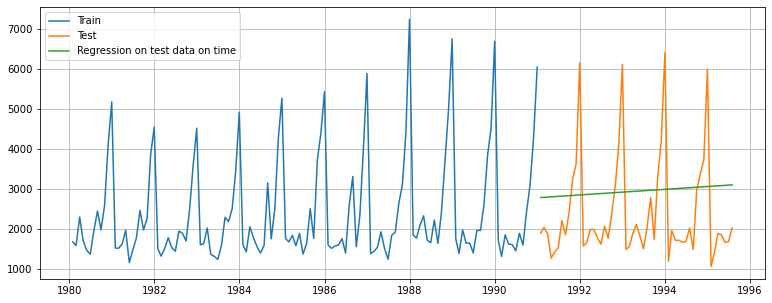

In [58]:
plt.figure(figsize=(13,5))
plt.plot(train_sprk['Sparkling'],label='Train')
plt.plot(test_sprk['Sparkling'],label='Test')
plt.plot(LinearRelgr_test_sprk['RegOntime'],label='Regression on test data on time')
plt.grid();
plt.legend(loc='best')

**Model Evaluation**

In [59]:
from sklearn import metrics

In [60]:
rmse_sprk_tr_model1 = metrics.mean_squared_error(train_sprk['Sparkling'],Tr_pred_sprk_model1,squared=False)
rmse_sprk_tr_model1

1279.32234587938

In [61]:
rmse_sprk_te_model1 = metrics.mean_squared_error(test_sprk['Sparkling'],Te_pred_sprk_model1,squared=False)
rmse_sprk_te_model1

1389.135174897992

Creating DataFrame

In [62]:
Evaluation_model1 = pd.DataFrame({'Test_Rmse':[rmse_sprk_te_model1]},index=['RegressionOnTime'])
Evaluation_model1 

Test_Rmse
RegressionOnTime  1389.135175

# Model2: Naive Approach

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

**If happening on January the same will happen on February as well** 

**So it is sometimes like assumption and not the prediction**

**The last value of the train or test will be the prediction for all others**

**We have added one new field called Naive and passing the last value of train data set into that**



In [63]:
nv_train_model2 = train_sprk.copy()
nv_test_model2= test_sprk.copy()

In [64]:
nv_test_model2['Naive'] = np.array(train_sprk['Sparkling']) [-1]

In [65]:
nv_test_model2.head()

Sparkling  Naive
TimeStamp                   
1991-01-31       1902   6047
1991-02-28       2049   6047
1991-03-31       1874   6047
1991-04-30       1279   6047
1991-05-31       1432   6047

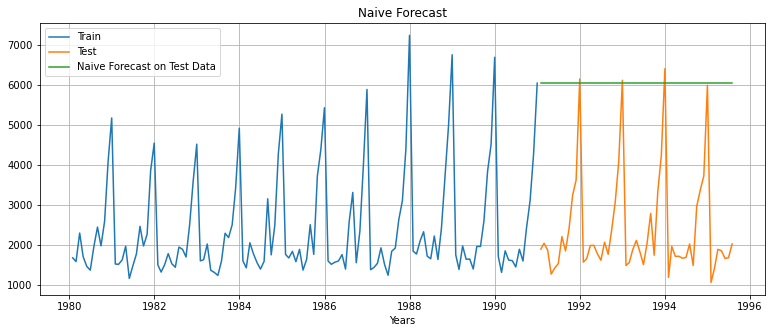

In [66]:
plt.figure(figsize=(13,5))
plt.plot(train_sprk['Sparkling'], label='Train')
plt.plot(test_sprk['Sparkling'], label='Test')
plt.plot(nv_test_model2['Naive'], label='Naive Forecast on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

**Model Evaluation**

In [67]:
rmse_sprk_te_model2 = metrics.mean_squared_error(test_sprk['Sparkling'],nv_test_model2['Naive'],squared=False)
rmse_sprk_te_model2

3864.2793518443914

In [68]:
Evaluation_model2 = pd.DataFrame({'Test_Rmse':[rmse_sprk_te_model2]},index=['NaiveModel'])

In [69]:
LGR_NV_Comb = pd.concat([Evaluation_model1,Evaluation_model2])

In [70]:
LGR_NV_Comb 

Test_Rmse
RegressionOnTime  1389.135175
NaiveModel        3864.279352

# Model3: Simple Avearage Model

**For this particular simple average method, we will forecast by using the average of the training values**


**It is simply the average value of wine over a specified period**


In [71]:
SimpleAverage_train_mod3 = train_sprk.copy()
SimpleAverage_test_mod3 = test_sprk.copy()

In [72]:
SimpleAverage_test_mod3['mean_forecast'] = train_sprk['Sparkling'].mean()
SimpleAverage_test_mod3.head()

Sparkling  mean_forecast
TimeStamp                           
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

In [73]:
SimpleAverage_train_mod3['mean_forecast'] = train_sprk['Sparkling'].mean()
SimpleAverage_train_mod3.head()

Sparkling  mean_forecast
TimeStamp                           
1980-01-31       1686    2403.780303
1980-02-29       1591    2403.780303
1980-03-31       2304    2403.780303
1980-04-30       1712    2403.780303
1980-05-31       1471    2403.780303

In [74]:
plt.figure(figsize=(13,5))
plt.plot(SimpleAverage_train_mod3['Sparkling'], label='Train')
plt.plot(SimpleAverage_test_mod3['Sparkling'], label='Test')
plt.plot(SimpleAverage_test_mod3['mean_forecast'], label='Simple Average on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

**Model Evaluation**

In [75]:
rmse_sprk_tr_model3 = metrics.mean_squared_error(train_sprk['Sparkling'],SimpleAverage_train_mod3['mean_forecast'],squared=False)
rmse_sprk_tr_model3

1298.4836279430988

In [76]:
rmse_sprk_te_model3 = metrics.mean_squared_error(test_sprk['Sparkling'],SimpleAverage_test_mod3['mean_forecast'],squared=False)
rmse_sprk_te_model3

1275.0818036965309

In [77]:
Evaluation_model3 = pd.DataFrame({'Test_Rmse':[rmse_sprk_te_model3]},index=['Simple Average'])
Evaluation_model3

Test_Rmse
Simple Average  1275.081804

**Model Comparisions:**

In [78]:
LGR_NV_SA_Comb = pd.concat([LGR_NV_Comb,Evaluation_model3])

In [79]:
LGR_NV_SA_Comb

Test_Rmse
RegressionOnTime  1389.135175
NaiveModel        3864.279352
Simple Average    1275.081804

# Model4: Moving Average

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [80]:
MovingAverage = df_sprk.copy()
MovingAverage.head()

Sparkling
TimeStamp            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [81]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
TimeStamp                                                            
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

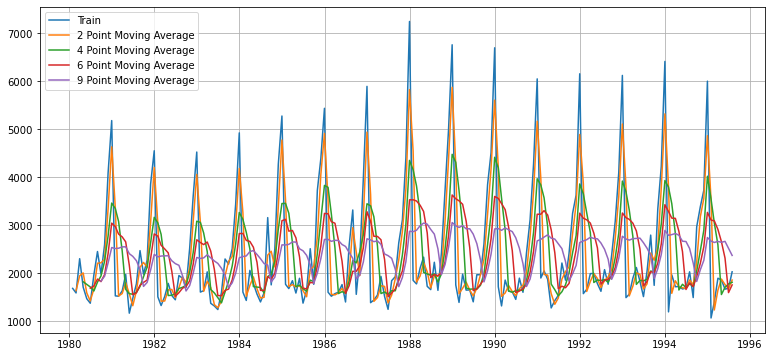

In [82]:
## Plotting on the whole data

plt.figure(figsize=(13,6))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

**Create train and test dataset**

In [83]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

In [84]:
trailing_MovingAverage_test.head()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
TimeStamp                                                              
1990-11-30       4286      3701.0     2857.75  2464.500000  2209.888889
1990-12-31       6047      5166.5     3968.25  3229.500000  2675.222222
1991-01-31       1902      3974.5     3837.75  3230.000000  2705.666667
1991-02-28       2049      1975.5     3571.00  3304.000000  2753.888889
1991-03-31       1874      1961.5     2968.00  3212.333333  2800.222222

In [85]:
trailing_MovingAverage_test.shape

(57, 5)

In [86]:
test_sprk.shape

(55, 1)

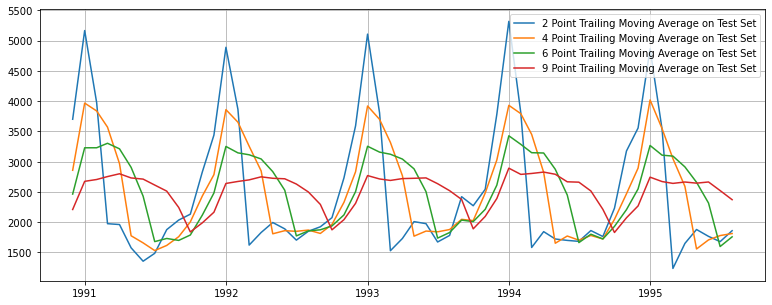

In [87]:
## Plotting on  Test data

plt.figure(figsize=(13,5))

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

**Model Evaluation**

In [88]:
##2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test_sprk['Sparkling'],trailing_MovingAverage_test['Trailing_2'][2:],squared=False)


##4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test_sprk['Sparkling'],trailing_MovingAverage_test['Trailing_4'][2:],squared=False)

##6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test_sprk['Sparkling'],trailing_MovingAverage_test['Trailing_6'][2:],squared=False)


## 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test_sprk['Sparkling'],trailing_MovingAverage_test['Trailing_9'][2:],squared=False)


In [89]:
Evaluation1 = pd.DataFrame({'Test_Rmse':[rmse_model4_test_2,rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9]},
                           index=['2 point Trailing MA','4 point Trailing MA','6 point Trailing MA','9 point Trailing MA'])
Evaluation1

Test_Rmse
2 point Trailing MA   813.400684
4 point Trailing MA  1156.589694
6 point Trailing MA  1283.927428
9 point Trailing MA  1346.278315

**Model Comparisions**

In [90]:
LGR_NV_SA_Comb = pd.concat([LGR_NV_SA_Comb,Evaluation1])
LGR_NV_SA_Comb

Test_Rmse
RegressionOnTime     1389.135175
NaiveModel           3864.279352
Simple Average       1275.081804
2 point Trailing MA   813.400684
4 point Trailing MA  1156.589694
6 point Trailing MA  1283.927428
9 point Trailing MA  1346.278315

In [91]:
plt.figure(figsize=(13,5))
plt.plot(train_sprk['Sparkling'], label='Train')
plt.plot(test_sprk['Sparkling'], label='Test')
plt.plot(LinearRelgr_test_sprk['RegOntime'],label='Regression on test data on time')
plt.plot(nv_test_model2['Naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test_mod3['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Smoothing Models

# Model5: Exponential Smoothing Model

•	The formula to calculate simple exponential is as below:

      Alpha* Yt + (1-Alpha) * Ft
      
•	Yt: Previous Day Value

•	(1-Alpha):  Previous day forecast

•	Ft: Future Forecast

•	Ex: When I am giving Alpha as .9 means I am giving .9 weight to what happened yesterday.

•	Alpha Ranges between 0 to 1

•	To find values we need previous day value and forecast. We will use multiple Alpha values and whatever is having lesser error we will use that Alpha as a final value.

 
 **Forecast error can be found as : squared(Actual - Predicted)**
 
 **And the average of above error is known as : Mean Sqaure Error**

In [92]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [93]:
SES_train = train_sprk.copy()
SES_test = test_sprk.copy()

In [94]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling']);

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [95]:
model_SES_autofit = SimpleExpSmoothing(SES_train['Sparkling']).fit(optimized=True,use_brute=True)

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [96]:
print(model_SES_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:              Sparkling   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                      228338410.448
Optimized:                       True   AIC                           1899.987
Trend:                           None   BIC                           1905.753
Seasonal:                        None   AICC                          1900.302
Seasonal Periods:                None   Date:                 Fri, 14 Jan 2022
Box-Cox:                        False   Time:                         14:15:48
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0496066                alpha                 True
initial_level              1818.5048                

In [97]:
model_SES_autofit.params

{'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.04960659880745982,
 'smoothing_seasonal': nan,
 'smoothing_trend': nan,
 'use_boxcox': False}

**Here as per the above parameters smoothing_level is 0.0496**
    
**It means Alpha= 0.0496**

In [98]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_sprk))
SES_test.head()

Sparkling      predict
TimeStamp                         
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339

In [100]:
plt.figure(figsize=(13,5))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions');

In [101]:
## Test Data

rmse_sprk_te_model4 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
rmse_sprk_te_model4

1316.034674096143

In [102]:
Evaluation_model4 = pd.DataFrame({'Test_Rmse':[rmse_sprk_te_model4]},index=['Alpha = 0.0496_simple_exponential'])
Evaluation_model4

Test_Rmse
Alpha = 0.0496_simple_exponential  1316.034674

In [103]:
LGR_NV_SA_SE_Comb = pd.concat([LGR_NV_SA_Comb,Evaluation_model4])
LGR_NV_SA_SE_Comb

Test_Rmse
RegressionOnTime                   1389.135175
NaiveModel                         3864.279352
Simple Average                     1275.081804
2 point Trailing MA                 813.400684
4 point Trailing MA                1156.589694
6 point Trailing MA                1283.927428
9 point Trailing MA                1346.278315
Alpha = 0.0496_simple_exponential  1316.034674

**Different Alpha Values**

Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [104]:
ResultSES = pd.DataFrame({'Alpha Values':[],'Train_Rmse':[],'Test_Rmse': []})
ResultSES

Empty DataFrame
Columns: [Alpha Values, Train_Rmse, Test_Rmse]
Index: []

In [105]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test_sprk))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    ResultSES = ResultSES.append({'Alpha Values':i,'Train_Rmse':rmse_model5_train_i 
                                      ,'Test_Rmse':rmse_model5_test_i}, ignore_index=True)

**Model Evaluation**

In [106]:
ResultSES.sort_values(by=['Test_Rmse'],ascending=True)

Alpha Values   Train_Rmse    Test_Rmse
0           0.3  1359.422161  1935.507132
1           0.4  1352.562366  2311.919615
2           0.5  1343.994119  2666.351413
3           0.6  1338.801426  2979.204388
4           0.7  1338.843297  3249.944092
5           0.8  1344.462034  3483.801006
6           0.9  1355.723493  3686.794285

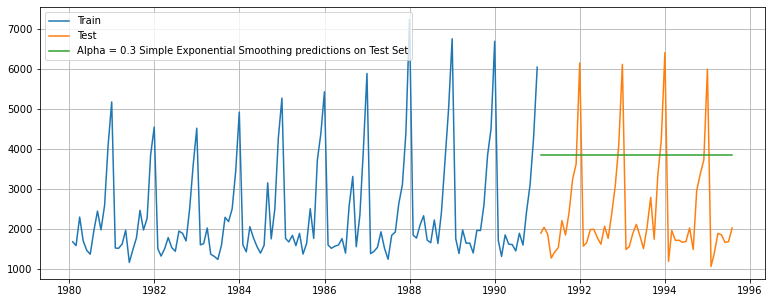

In [107]:
plt.figure(figsize=(13,5))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.3], label='Alpha = 0.3 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [108]:
Evaluation_model44 = pd.DataFrame({'Test_Rmse':[ResultSES.sort_values(by=['Test_Rmse'],ascending=True).values[0][2]]},index=['Alpha = 0.3_simple_exponential'])
Evaluation_model44

Test_Rmse
Alpha = 0.3_simple_exponential  1935.507132

In [109]:
LGR_NV_SA_SE_Comb1 = pd.concat([LGR_NV_SA_SE_Comb,Evaluation_model44])
LGR_NV_SA_SE_Comb1

Test_Rmse
RegressionOnTime                   1389.135175
NaiveModel                         3864.279352
Simple Average                     1275.081804
2 point Trailing MA                 813.400684
4 point Trailing MA                1156.589694
6 point Trailing MA                1283.927428
9 point Trailing MA                1346.278315
Alpha = 0.0496_simple_exponential  1316.034674
Alpha = 0.3_simple_exponential     1935.507132

**Tried with Some other lower Alpha values**

In [110]:
ResultSES = pd.DataFrame({'Alpha Values':[],'Train_Rmse':[],'Test_Rmse': []})
ResultSES

Empty DataFrame
Columns: [Alpha Values, Train_Rmse, Test_Rmse]
Index: []

In [111]:
for i in np.arange(0.01,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test_sprk))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    ResultSES = ResultSES.append({'Alpha Values':i,'Train_Rmse':rmse_model5_train_i 
                                      ,'Test_Rmse':rmse_model5_test_i}, ignore_index=True)

In [112]:
ResultSES.sort_values(by=['Test_Rmse'],ascending=True)

Alpha Values   Train_Rmse    Test_Rmse
0          0.01  1302.063355  1276.251564
1          0.11  1335.224198  1390.502840
2          0.21  1356.797829  1625.101684
3          0.31  1359.044002  1972.843244
4          0.41  1351.666203  2348.917539
5          0.51  1343.272698  2699.604628
6          0.61  1338.557733  3008.106488
7          0.71  1339.153867  3274.888746
8          0.81  1345.331307  3505.393351
9          0.91  1357.171874  3705.611326

In [113]:
plt.figure(figsize=(13,5))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.01], label='Alpha = 0.01 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [114]:
Evaluation_model444 = pd.DataFrame({'Test_Rmse':[ResultSES.sort_values(by=['Test_Rmse'],ascending=True).values[0][2]]},index=['Alpha = 0.01_simple_exponential'])
Evaluation_model444

Test_Rmse
Alpha = 0.01_simple_exponential  1276.251564

In [115]:
LGR_NV_SA_SE_Comb1 = pd.concat([LGR_NV_SA_SE_Comb1,Evaluation_model444])
LGR_NV_SA_SE_Comb1

Test_Rmse
RegressionOnTime                   1389.135175
NaiveModel                         3864.279352
Simple Average                     1275.081804
2 point Trailing MA                 813.400684
4 point Trailing MA                1156.589694
6 point Trailing MA                1283.927428
9 point Trailing MA                1346.278315
Alpha = 0.0496_simple_exponential  1316.034674
Alpha = 0.3_simple_exponential     1935.507132
Alpha = 0.01_simple_exponential    1276.251564

# Model6: Double Exponential Smoothing

Two parameters  αα  and  ββ  are estimated in this model. Level and Trend are accounted for in this model.

In [116]:
DES_train = train_sprk.copy()
DES_test = test_sprk.copy()

In [117]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [118]:
model_DES2=model_DES.fit()

In [119]:
model_DES2.params

{'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': -95.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.6885714285714285,
 'smoothing_seasonal': nan,
 'smoothing_trend': 9.999999999999999e-05,
 'use_boxcox': False}

**Smoothing trend = Beta(9.9999)
Smoothing_level = Alpha (0.6885)**

**Model Evaluation**

In [120]:
rmse_sprk_te_model5 = metrics.mean_squared_error(DES_test['Sparkling'],model_DES2.forecast(steps=len(DES_test)),squared=False)
rmse_sprk_te_model5

2007.238525758568

In [121]:
Evaluation_model5 = pd.DataFrame({'Test_Rmse':[rmse_sprk_te_model5]},index=['Alpha = 0.68, Beta = 9.999999999999999e-05_DoubleExponentialSmoothing'])
Evaluation_model5

Test_Rmse
Alpha = 0.68, Beta = 9.999999999999999e-05_Doub...  2007.238526

In [122]:
LGR_NV_SA_SE_Comb = pd.concat([LGR_NV_SA_SE_Comb1,Evaluation_model5])
LGR_NV_SA_SE_Comb

Test_Rmse
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
Simple Average                                      1275.081804
2 point Trailing MA                                  813.400684
4 point Trailing MA                                 1156.589694
6 point Trailing MA                                 1283.927428
9 point Trailing MA                                 1346.278315
Alpha = 0.0496_simple_exponential                   1316.034674
Alpha = 0.3_simple_exponential                      1935.507132
Alpha = 0.01_simple_exponential                     1276.251564
Alpha = 0.68, Beta = 9.999999999999999e-05_Doub...  2007.238526

In [123]:
##Empty dataframe to keep values from the loop

model5 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train_Rmse':[],'Test_Rmse': []})
model5

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train_Rmse, Test_Rmse]
Index: []

In [124]:
for i in np.arange(0.1,1,0.3): #Tried first with 0.3,1 and 0.01 but rmse value was too high. 
    for j in np.arange(0.1,1,0.3):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j,optimized=False)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test_sprk))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        model5 = model5.append({'Alpha Values':i,'Beta Values':j,'Train_Rmse':rmse_model6_train
                                          ,'Test_Rmse':rmse_model6_test}, ignore_index=True)

In [125]:
model5.sort_values(by=['Test_Rmse']).head(15)

Alpha Values  Beta Values   Train_Rmse     Test_Rmse
0           0.1          0.1  1382.520870   1778.564670
1           0.1          0.4  1480.897776   6039.537339
3           0.4          0.1  1424.267932   8039.101904
2           0.1          0.7  1619.702414   9992.938079
6           0.7          0.1  1399.271428  12268.287993
4           0.4          0.4  1631.966900  32084.192549
7           0.7          0.4  1542.510857  37264.297237
5           0.4          0.7  1704.098949  44793.173791
8           0.7          0.7  1669.733761  49966.722603

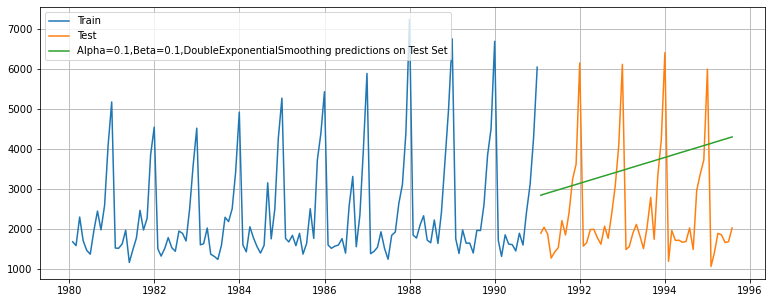

In [126]:
plt.figure(figsize=(13,5))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [127]:
Evaluation_model55 = pd.DataFrame({'Test_Rmse':[model5.sort_values(by=['Test_Rmse'],ascending=True).values[0][3]]},index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])
Evaluation_model55

Test_Rmse
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1778.56467

In [128]:
LGR_NV_SA_SE_Comb = pd.concat([LGR_NV_SA_SE_Comb,Evaluation_model55])
LGR_NV_SA_SE_Comb

Test_Rmse
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
Simple Average                                      1275.081804
2 point Trailing MA                                  813.400684
4 point Trailing MA                                 1156.589694
6 point Trailing MA                                 1283.927428
9 point Trailing MA                                 1346.278315
Alpha = 0.0496_simple_exponential                   1316.034674
Alpha = 0.3_simple_exponential                      1935.507132
Alpha = 0.01_simple_exponential                     1276.251564
Alpha = 0.68, Beta = 9.999999999999999e-05_Doub...  2007.238526
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670

# Model7 : Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  αα ,  ββ  and  γγ  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [129]:
TES_train = train_sprk.copy()
TES_test = test_sprk.copy()

In [130]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'].astype("double"),trend='additive',seasonal='additive',freq='M')

In [131]:
model_TES_autofit = model_TES.fit()

In [132]:
model_TES_autofit.params

{'damping_trend': nan,
 'initial_level': 1640.1902753907443,
 'initial_seasons': array([  45.90361105,  -48.98901601,  662.93574184,   72.68956205,
        -168.88460592, -262.45241144,  326.06682266,  813.234229  ,
         344.33127127,  956.08566808, 2446.81374774, 3538.46000598]),
 'initial_trend': -2.8837110960406562,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.11251388262482392,
 'smoothing_seasonal': 0.49368789339692953,
 'smoothing_trend': 0.03751390043800653,
 'use_boxcox': False}

In [133]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test['Sparkling']))
TES_test.head()

Sparkling  auto_predict
TimeStamp                          
1991-01-31       1902   1474.614641
1991-02-28       2049   1169.444330
1991-03-31       1874   1658.498607
1991-04-30       1279   1504.366521
1991-05-31       1432   1417.164022

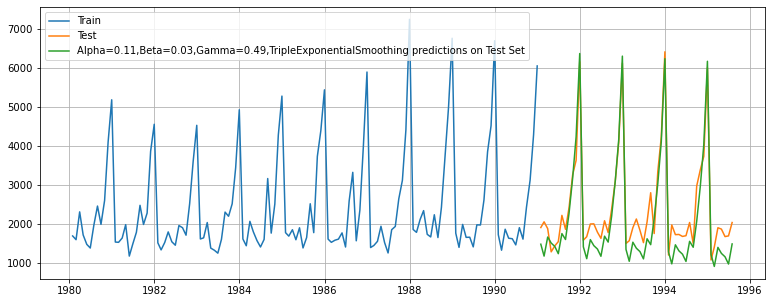

In [134]:
## Plotting 
plt.figure(figsize=(13,5))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.11,Beta=0.03,Gamma=0.49,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [135]:
rmse_sprk_te_model6 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
rmse_sprk_te_model6

473.95441102677427

In [136]:
Evaluation_model6 = pd.DataFrame({'Test_Rmse':[rmse_sprk_te_model6]},index=['Alpha=0.11,Beta=0.03,Gamma=0.49,TripleExponentialSmoothing'])
Evaluation_model6

Test_Rmse
Alpha=0.11,Beta=0.03,Gamma=0.49,TripleExponenti...  473.954411

In [137]:
LGR_NV_SA_SE_Comb = pd.concat([LGR_NV_SA_SE_Comb,Evaluation_model6])
LGR_NV_SA_SE_Comb

Test_Rmse
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
Simple Average                                      1275.081804
2 point Trailing MA                                  813.400684
4 point Trailing MA                                 1156.589694
6 point Trailing MA                                 1283.927428
9 point Trailing MA                                 1346.278315
Alpha = 0.0496_simple_exponential                   1316.034674
Alpha = 0.3_simple_exponential                      1935.507132
Alpha = 0.01_simple_exponential                     1276.251564
Alpha = 0.68, Beta = 9.999999999999999e-05_Doub...  2007.238526
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.11,Beta=0.03,Gamma=0.49,TripleExponenti...   473.954411

In [138]:
## Empty DataFrame

model6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train_Rmse':[],'Test_Rmse': []})
model6

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train_Rmse, Test_Rmse]
Index: []

In [139]:
for i in np.arange(0.03,1.1,0.1):
    for j in np.arange(0.03,1.1,0.1):
        for k in np.arange(0.03,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test['Sparkling']))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            model6 = model6.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train_Rmse':rmse_model8_train,'Test_Rmse':rmse_model8_test}
                                                 , ignore_index=True)

In [140]:
model6.sort_values(by=['Test_Rmse']).head()

Alpha Values  Beta Values  Gamma Values  Train_Rmse   Test_Rmse
3            0.03         0.03          0.33  410.406536  317.553880
122          0.13         0.03          0.13  416.264660  325.256121
243          0.23         0.03          0.13  425.701628  326.351021
364          0.33         0.03          0.13  435.742430  327.818278
2            0.03         0.03          0.23  426.249806  329.788722

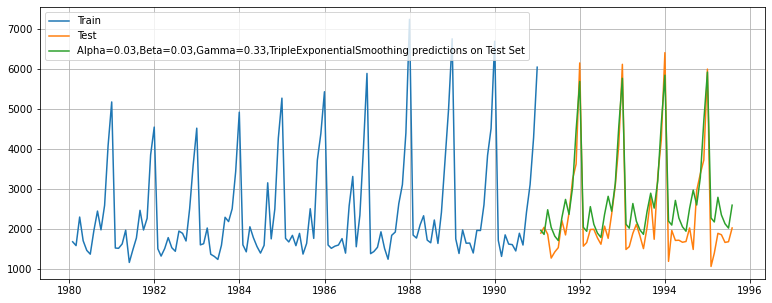

In [141]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(13,5))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.03, 0.03, 0.03], label='Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [142]:
Evaluation_model66 = pd.DataFrame({'Test_Rmse':[model6.sort_values(by=['Test_Rmse'],ascending=True).values[0][4]]},index=['Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing'])
Evaluation_model66

Test_Rmse
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...  317.55388

In [143]:
Final_Sparkling = pd.concat([LGR_NV_SA_SE_Comb,Evaluation_model66])
Final_Sparkling

Test_Rmse
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
Simple Average                                      1275.081804
2 point Trailing MA                                  813.400684
4 point Trailing MA                                 1156.589694
6 point Trailing MA                                 1283.927428
9 point Trailing MA                                 1346.278315
Alpha = 0.0496_simple_exponential                   1316.034674
Alpha = 0.3_simple_exponential                      1935.507132
Alpha = 0.01_simple_exponential                     1276.251564
Alpha = 0.68, Beta = 9.999999999999999e-05_Doub...  2007.238526
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.11,Beta=0.03,Gamma=0.49,TripleExponenti...   473.954411
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...   317.553880

# Rose_csv

# Model1: Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
train_time_rose = [i+1 for i in range(len(train_rose))]   
test_time_rose = [i+133 for i in range(len(test_rose))] 
print('Training Time instance','\n',train_time_rose)
print('Test Time instance','\n',test_time_rose)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [146]:
LinearRlgr_train_rose = train_rose.copy()
LinearRelgr_test_rose = test_rose.copy()

In [147]:
LinearRlgr_train_rose['time'] = train_time_rose
LinearRelgr_test_rose['time'] = test_time_rose

In [132]:
print('First few rows of Training Data','\n',LinearRlgr_train_rose.head(),'\n')
print('Last few rows of Training Data','\n',LinearRlgr_train_rose.tail(),'\n')
print('First few rows of Test Data','\n',LinearRelgr_test_rose.head(),'\n')
print('Last few rows of Test Data','\n',LinearRelgr_test_rose.tail(),'\n')

First few rows of Training Data 
              Rose  time
TimeStamp              
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
TimeStamp              
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
TimeStamp             
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
TimeStamp             
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [148]:
lr_rose = LinearRegression()

In [149]:
lr_rose.fit(LinearRlgr_train_rose[['time']],LinearRlgr_train_rose['Rose'].values)

LinearRegression()

In [150]:
lr_rose.intercept_

137.81552162849874

In [151]:
lr_rose.coef_

array([-0.49437786])

In [152]:
Tr_pred_rose_model1= lr_rose.predict(LinearRlgr_train_rose[['time']])
LinearRlgr_train_rose['RegOntime'] = Tr_pred_rose_model1
LinearRlgr_train_rose.head()

Rose  time   RegOntime
TimeStamp                          
1980-01-31  112.0     1  137.321144
1980-02-29  118.0     2  136.826766
1980-03-31  129.0     3  136.332388
1980-04-30   99.0     4  135.838010
1980-05-31  116.0     5  135.343632

In [153]:
Te_pred_rose_model1 = lr_rose.predict(LinearRelgr_test_rose[['time']])
LinearRelgr_test_rose['RegOntime'] = Te_pred_rose_model1
LinearRelgr_test_rose.head()

Rose  time  RegOntime
TimeStamp                        
1991-01-31  54.0   133  72.063266
1991-02-28  55.0   134  71.568888
1991-03-31  66.0   135  71.074511
1991-04-30  65.0   136  70.580133
1991-05-31  60.0   137  70.085755

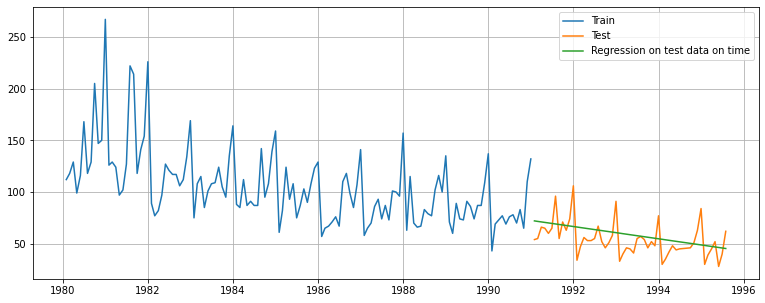

In [154]:
plt.figure(figsize=(13,5))
plt.plot(train_rose['Rose'],label='Train')
plt.plot(test_rose['Rose'],label='Test')
plt.plot(LinearRelgr_test_rose['RegOntime'],label='Regression on test data on time')
plt.grid();
plt.legend(loc='best')

**Model Evaluation**

In [155]:
from sklearn import metrics

In [156]:
rmse_rose_te_model1 = metrics.mean_squared_error(test_rose['Rose'],Te_pred_rose_model1,squared=False)
rmse_rose_te_model1

15.268955197146555

In [157]:
Evaluation_model1 = pd.DataFrame({'Test_Rmse':[rmse_rose_te_model1]},index=['RegressionOnTime'])
Evaluation_model1 

Test_Rmse
RegressionOnTime  15.268955

# Model2: Naive Approach

In [158]:
nv_train_model2 = train_rose.copy()
nv_test_model2= test_rose.copy()

In [159]:
nv_train_model2['Naive'] = train_rose['Rose'] [-1]
nv_test_model2['Naive'] = train_rose['Rose'] [-1]

In [160]:
nv_train_model2.head()

Rose  Naive
TimeStamp               
1980-01-31  112.0  132.0
1980-02-29  118.0  132.0
1980-03-31  129.0  132.0
1980-04-30   99.0  132.0
1980-05-31  116.0  132.0

In [161]:
nv_test_model2.head()

Rose  Naive
TimeStamp              
1991-01-31  54.0  132.0
1991-02-28  55.0  132.0
1991-03-31  66.0  132.0
1991-04-30  65.0  132.0
1991-05-31  60.0  132.0

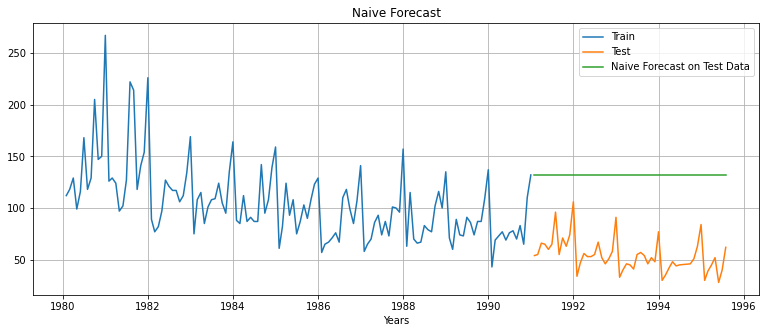

In [162]:
plt.figure(figsize=(13,5))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(nv_test_model2['Naive'], label='Naive Forecast on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

**Model Evaluation**

In [163]:
rmse_rose_te_model2 = metrics.mean_squared_error(test_rose['Rose'],nv_test_model2['Naive'],squared=False)
rmse_rose_te_model2

79.71877337417347

In [164]:
Evaluation_model2 = pd.DataFrame({'Test_Rmse':[rmse_rose_te_model2]},index=['NaiveModel'])
Evaluation_model2

Test_Rmse
NaiveModel  79.718773

In [165]:
comb1 = pd.concat([Evaluation_model1,Evaluation_model2])

In [166]:
comb1

Test_Rmse
RegressionOnTime  15.268955
NaiveModel        79.718773

# Method3: Simple Average

In [167]:
SimpleAverage_train_mod3 = train_rose.copy()
SimpleAverage_test_mod3 = test_rose.copy()

In [168]:
SimpleAverage_test_mod3['mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_test_mod3.head()

Rose  mean_forecast
TimeStamp                      
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

In [169]:
SimpleAverage_train_mod3['mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_train_mod3.head()

Rose  mean_forecast
TimeStamp                       
1980-01-31  112.0     104.939394
1980-02-29  118.0     104.939394
1980-03-31  129.0     104.939394
1980-04-30   99.0     104.939394
1980-05-31  116.0     104.939394

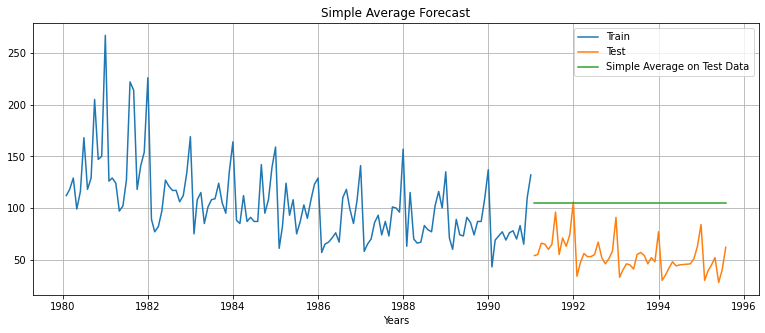

In [170]:
plt.figure(figsize=(13,5))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(SimpleAverage_test_mod3['mean_forecast'], label='Simple Average on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

**Model Evaluations**

In [171]:
rmse_rose_te_model3 = metrics.mean_squared_error(test_rose['Rose'],SimpleAverage_test_mod3['mean_forecast'],squared=False)
rmse_rose_te_model3

53.460569646114436

In [172]:
Evaluation_model3 = pd.DataFrame({'Test_Rmse':[rmse_rose_te_model3]},index=['Simple Average'])
Evaluation_model3

Test_Rmse
Simple Average   53.46057

In [173]:
comb2 = pd.concat([comb1,Evaluation_model3])

In [174]:
comb2

Test_Rmse
RegressionOnTime  15.268955
NaiveModel        79.718773
Simple Average    53.460570

# Model4: Moving Average Model

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here. For Moving Average, we are going to average over the entire data.


In [175]:
MovingAverage = df_rose.copy()
MovingAverage.head()

Rose
TimeStamp        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [176]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
TimeStamp                                                        
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

Plot on whole data

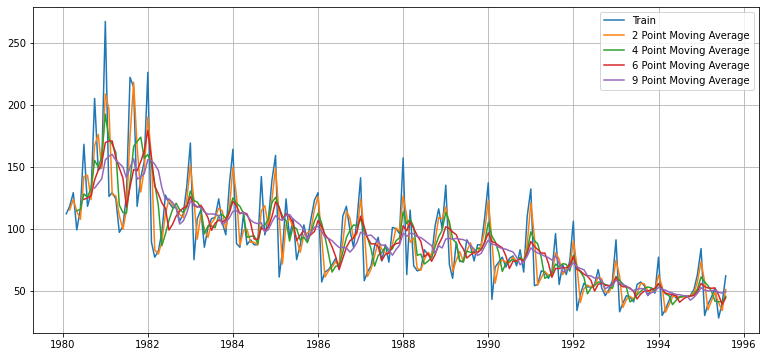

In [177]:
plt.figure(figsize=(13,6))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Building train and test data

In [178]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

In [179]:
trailing_MovingAverage_test.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
TimeStamp                                                        
1990-11-30  110.0        87.5       82.00   80.333333   77.888889
1990-12-31  132.0       121.0       97.50   89.666667   84.444444
1991-01-31   54.0        93.0       90.25   85.666667   81.888889
1991-02-28   55.0        54.5       87.75   83.166667   80.333333
1991-03-31   66.0        60.5       76.75   80.333333   79.222222

In [168]:
trailing_MovingAverage_test.shape

(57, 5)

In [169]:
test_rose.shape

(55, 1)

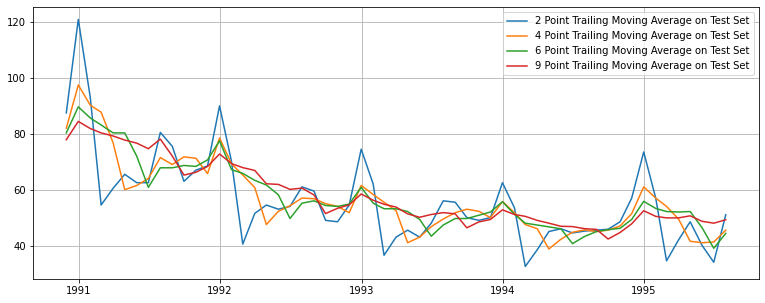

In [180]:
## Plotting on  Test data

plt.figure(figsize=(13,5))

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

**Model Evaluation**

In [181]:
##2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_2'][2:],squared=False)


##4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_4'][2:],squared=False)

##6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_6'][2:],squared=False)


## 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Trailing_9'][2:],squared=False)


In [182]:
Evaluation2 = pd.DataFrame({'Test_Rmse':[rmse_model4_test_2,rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9]},
                           index=['2 point Trailing MA','4 point Trailing MA','6 point Trailing MA','9 point Trailing MA'])
Evaluation2

Test_Rmse
2 point Trailing MA  11.529278
4 point Trailing MA  14.451403
6 point Trailing MA  14.566327
9 point Trailing MA  14.727630

**Model Comparisions**

In [183]:
comb2 = pd.concat([comb2,Evaluation2])
comb2

Test_Rmse
RegressionOnTime     15.268955
NaiveModel           79.718773
Simple Average       53.460570
2 point Trailing MA  11.529278
4 point Trailing MA  14.451403
6 point Trailing MA  14.566327
9 point Trailing MA  14.727630

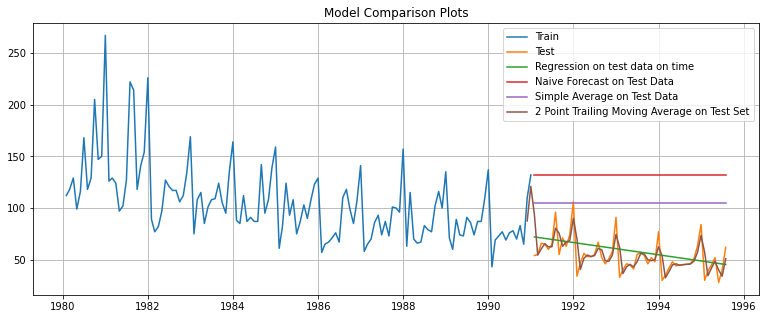

In [184]:
plt.figure(figsize=(13,5))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')

plt.plot(LinearRelgr_test_rose['RegOntime'],label='Regression on test data on time')

plt.plot(nv_test_model2['Naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test_mod3['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Model5: Simple Exponential Smoothing Model

In [185]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [186]:
SES_train = train_rose.copy()
SES_test = test_rose.copy()

In [187]:
model_SES = SimpleExpSmoothing(SES_train['Rose']);

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [188]:
model_SES_autofit = SimpleExpSmoothing(SES_train['Rose']).fit(optimized=True,use_brute=True)

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [189]:
print(model_SES_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                   Rose   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                         130984.223
Optimized:                       True   AIC                            914.804
Trend:                           None   BIC                            920.570
Seasonal:                        None   AICC                           915.119
Seasonal Periods:                None   Date:                 Fri, 14 Jan 2022
Box-Cox:                        False   Time:                         17:22:35
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0987499                alpha                 True
initial_level              134.38700                

In [190]:
model_SES_autofit.params

{'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.09874989743650385,
 'smoothing_seasonal': nan,
 'smoothing_trend': nan,
 'use_boxcox': False}

**smoothing_level= 0.09874989743650385**

**It means Alpha = 0.09874989743650385**

In [191]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_rose))
SES_test.head()

Rose    predict
TimeStamp                  
1991-01-31  54.0  87.104999
1991-02-28  55.0  87.104999
1991-03-31  66.0  87.104999
1991-04-30  65.0  87.104999
1991-05-31  60.0  87.104999

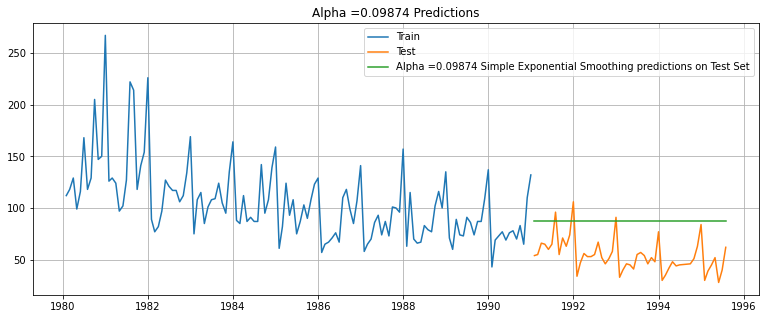

In [192]:
plt.figure(figsize=(13,5))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.09874 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.09874 Predictions');

Model evaluation

In [193]:
rmse_rose_te_model4 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
rmse_rose_te_model4

36.79624206134511

In [194]:
Evaluation_model4 = pd.DataFrame({'Test_Rmse':[rmse_rose_te_model4]},index=['Alpha=0.098749_simple_exponential'])
Evaluation_model4

Test_Rmse
Alpha=0.098749_simple_exponential  36.796242

In [195]:
comb3 = pd.concat([comb2,Evaluation_model4])
comb3

Test_Rmse
RegressionOnTime                   15.268955
NaiveModel                         79.718773
Simple Average                     53.460570
2 point Trailing MA                11.529278
4 point Trailing MA                14.451403
6 point Trailing MA                14.566327
9 point Trailing MA                14.727630
Alpha=0.098749_simple_exponential  36.796242

**Predicting using different alpha values**

In [196]:
Evaluation_model4 = pd.DataFrame({'Alpha Values':[],'Train_Rmse':[],'Test_Rmse': []})
Evaluation_model4

Empty DataFrame
Columns: [Alpha Values, Train_Rmse, Test_Rmse]
Index: []

In [197]:
for i in np.arange(0.03,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test_rose))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    Evaluation_model4 = Evaluation_model4.append({'Alpha Values':i,'Train_Rmse':rmse_model5_train_i 
                                      ,'Test_Rmse':rmse_model5_test_i}, ignore_index=True)

In [198]:
Evaluation_model4.sort_values(by=['Test_Rmse'],ascending=True).head(15)

Alpha Values  Train_Rmse  Test_Rmse
4           0.07   31.619992  36.437144
5           0.08   31.544082  36.463301
3           0.06   31.759176  36.585857
6           0.09   31.509019  36.604198
7           0.10   31.501015  36.828051
2           0.05   31.999043  37.031499
8           0.11   31.511359  37.116421
9           0.12   31.534401  37.457461
10          0.13   31.566390  37.842808
1           0.04   32.402664  38.030304
11          0.14   31.604773  38.266078
12          0.15   31.647780  38.722125
13          0.16   31.694161  39.206638
14          0.17   31.743014  39.715915
0           0.03   33.071096  40.100764

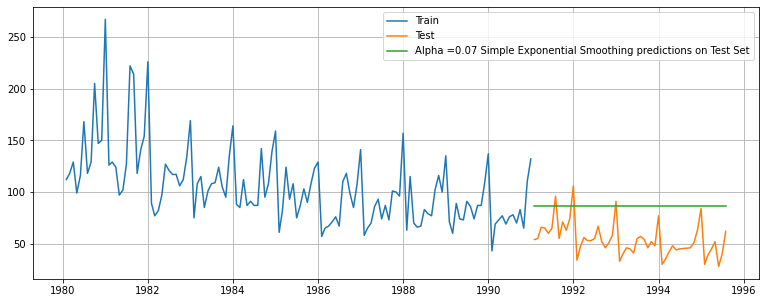

In [199]:
plt.figure(figsize=(13,5))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict', 0.07], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

**Model Evaluation**

In [200]:
Evaluation_model44 = pd.DataFrame({'Test_Rmse':[Evaluation_model4.sort_values(by=['Test_Rmse'],ascending=True).values[0][2]]},index=['Alpha=0.07_simple_exponential'])
Evaluation_model44


Test_Rmse
Alpha=0.07_simple_exponential  36.437144

In [201]:
comb4 = pd.concat([comb3,Evaluation_model44])
comb4

Test_Rmse
RegressionOnTime                   15.268955
NaiveModel                         79.718773
Simple Average                     53.460570
2 point Trailing MA                11.529278
4 point Trailing MA                14.451403
6 point Trailing MA                14.566327
9 point Trailing MA                14.727630
Alpha=0.098749_simple_exponential  36.796242
Alpha=0.07_simple_exponential      36.437144

# Model5: Double Exponential Smoothing

In [202]:
DES_train = train_rose.copy()
DES_test = test_rose.copy()

In [203]:
model_DES = Holt(DES_train['Rose'])

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [204]:
model_DES1 = Holt(DES_train['Rose'].astype("double")).fit()

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [204]:
model_DES1.params

{'damping_trend': nan,
 'initial_level': 137.81555273182406,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': -0.49437822071047205,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 1.4903109413942238e-08,
 'smoothing_seasonal': nan,
 'smoothing_trend': 3.0715523798138926e-18,
 'use_boxcox': False}

**smoothing_level= 1.4903109413942238e-08 (Alpha)**

**smoothing_trend= 3.0715523798138926e-18 (Beta)**

Alpha and Beta values do not seem to be appropriate. So here checking using different alpha and beta values

In [205]:
model5 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train_Rmse':[],'Test_Rmse': []})
model5

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train_Rmse, Test_Rmse]
Index: []

In [206]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(DES_test['Rose']))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        model5 = model5.append({'Alpha Values':i,'Beta Values':j,'Train_Rmse':rmse_model6_train
                                          ,'Test_Rmse':rmse_model6_test}, ignore_index=True)

In [207]:
model5.sort_values(by=['Test_Rmse']).head()

Alpha Values  Beta Values  Train_Rmse   Test_Rmse
0            0.3          0.3   35.928003  265.567594
8            0.4          0.3   36.733732  339.306534
1            0.3          0.4   37.356026  358.750942
16           0.5          0.3   37.424080  394.272629
24           0.6          0.3   38.343309  439.296033

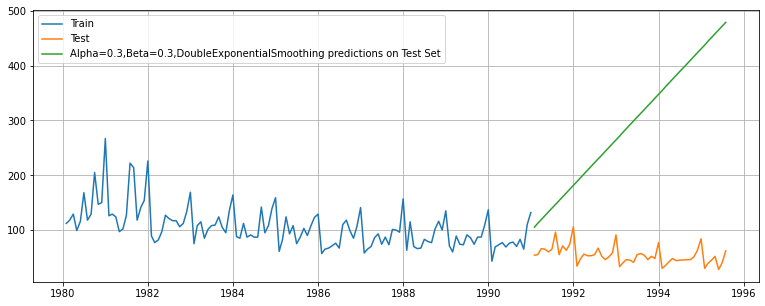

In [208]:
plt.figure(figsize=(13,5))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [209]:
Evaluation_model5 = pd.DataFrame({'Test_Rmse':[model5.sort_values(by=['Test_Rmse'],ascending=True).values[0][3]]},index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])
Evaluation_model5

Test_Rmse
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  265.567594

In [210]:
comb5 = pd.concat([comb4,Evaluation_model5])
comb5

Test_Rmse
RegressionOnTime                                15.268955
NaiveModel                                      79.718773
Simple Average                                  53.460570
2 point Trailing MA                             11.529278
4 point Trailing MA                             14.451403
6 point Trailing MA                             14.566327
9 point Trailing MA                             14.727630
Alpha=0.098749_simple_exponential               36.796242
Alpha=0.07_simple_exponential                   36.437144
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  265.567594

# Model6: Triple Exponential Smoothing

In [211]:
TES_train = train_rose.copy()
TES_test = test_rose.copy()

In [212]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive',freq='M')

In [213]:
model_TES_autofit = model_TES.fit()

In [214]:
model_TES_autofit.params

{'damping_trend': nan,
 'initial_level': 77.11036129701158,
 'initial_seasons': array([ 38.58373015,  50.95130378,  58.95614925,  48.32221437,
         57.14275984,  62.60157198,  72.5131572 ,  78.61072041,
         74.61515095,  72.70513949,  90.79473256, 133.07311343]),
 'initial_trend': -0.5507034501187452,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.08785282838428403,
 'smoothing_seasonal': 0.0003888321680219632,
 'smoothing_trend': 4.750900546548364e-06,
 'use_boxcox': False}

In [215]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_rose['Rose']))
TES_test.head()

Rose  auto_predict
TimeStamp                     
1991-01-31  54.0     42.581002
1991-02-28  55.0     54.397903
1991-03-31  66.0     61.852025
1991-04-30  65.0     50.667434
1991-05-31  60.0     58.937236

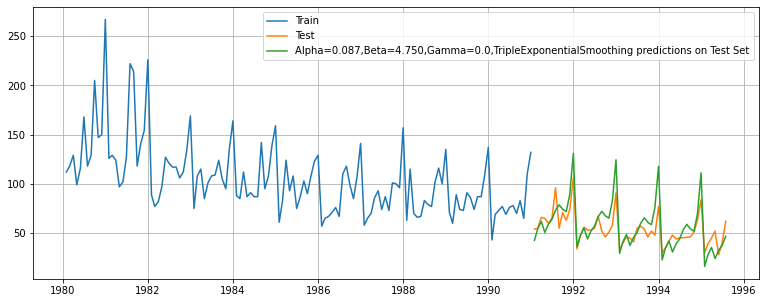

In [216]:
plt.figure(figsize=(13,5))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.087,Beta=4.750,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

**Model evaluation**

In [217]:
rmse_rose_te_model6 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)

In [218]:
Evaluation_model6 = pd.DataFrame({'Test_Rmse':[rmse_rose_te_model6]},index=['Alpha=0.087,Beta=4.750,Gamma=0,TripleExponentialSmoothing'])
Evaluation_model6

Test_Rmse
Alpha=0.087,Beta=4.750,Gamma=0,TripleExponentia...  14.241476

In [219]:
comb6 = pd.concat([comb5,Evaluation_model6])
comb6

Test_Rmse
RegressionOnTime                                     15.268955
NaiveModel                                           79.718773
Simple Average                                       53.460570
2 point Trailing MA                                  11.529278
4 point Trailing MA                                  14.451403
6 point Trailing MA                                  14.566327
9 point Trailing MA                                  14.727630
Alpha=0.098749_simple_exponential                    36.796242
Alpha=0.07_simple_exponential                        36.437144
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567594
Alpha=0.087,Beta=4.750,Gamma=0,TripleExponentia...   14.241476

In [220]:
model6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train_Rmse':[],'Test_Rmse': []})
model6

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train_Rmse, Test_Rmse]
Index: []

In [221]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_slope=j,smoothing_seasonal=k)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test['Rose']))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            model6 = model6.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train_Rmse':rmse_model8_train,'Test_Rmse':rmse_model8_test}
                                                 , ignore_index=True)

In [222]:
model6.sort_values(by=['Test_Rmse']).head()

Alpha Values  Beta Values  Gamma Values  Train_Rmse  Test_Rmse
0            0.3          0.3           0.3   23.881752  12.662475
8            0.3          0.4           0.3   24.564486  13.543286
17           0.3          0.5           0.4   25.873014  14.269845
44           0.3          0.8           0.7   31.033553  14.789028
67           0.4          0.3           0.6   27.403104  14.884007

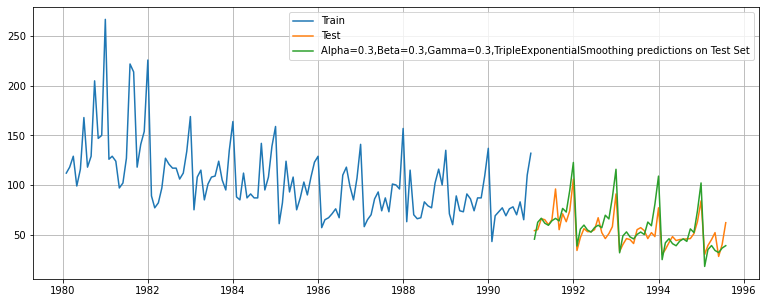

In [223]:
plt.figure(figsize=(13,5))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

**Model Evaluation**

In [224]:
Evaluation_model6 = pd.DataFrame({'Test_Rmse':[model6.sort_values(by=['Test_Rmse'],ascending=True).values[0][4]]},index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])
Evaluation_model6

Test_Rmse
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...  12.662475

In [225]:
Final_rose = pd.concat([comb6,Evaluation_model6])
Final_rose

Test_Rmse
RegressionOnTime                                     15.268955
NaiveModel                                           79.718773
Simple Average                                       53.460570
2 point Trailing MA                                  11.529278
4 point Trailing MA                                  14.451403
6 point Trailing MA                                  14.566327
9 point Trailing MA                                  14.727630
Alpha=0.098749_simple_exponential                    36.796242
Alpha=0.07_simple_exponential                        36.437144
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567594
Alpha=0.087,Beta=4.750,Gamma=0,TripleExponentia...   14.241476
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...   12.662475

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

# Sparkling.csv

In [226]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean()
    rolstd = timeseries.rolling(window=6).std()

    #Plot rolling statistics:
    plt.figure(figsize=(14,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

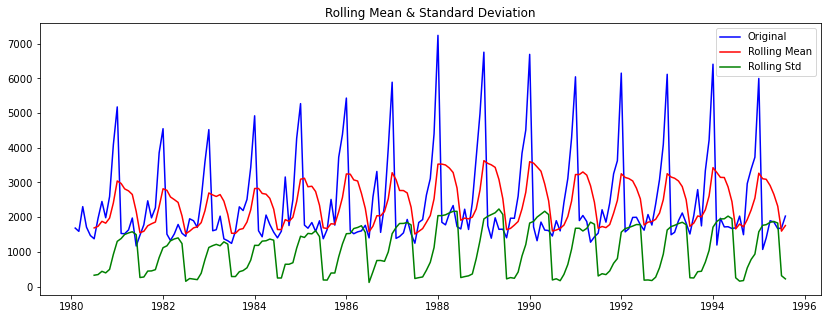

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [227]:
test_stationarity(df_sprk['Sparkling'])

Null Hypothesis - Timeseries is not stationary

Alternate Hypothesis - Timeseries is stationary

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

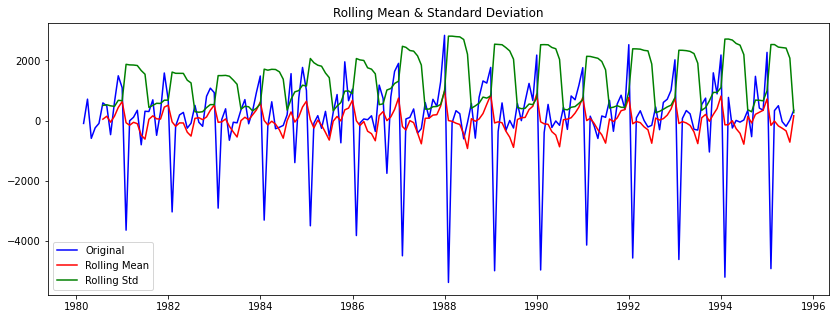

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [228]:
test_stationarity(df_sprk['Sparkling'].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is stationary

In [229]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [230]:
plot_acf(df_sprk['Sparkling'].diff().dropna(),lags=50)
plt.show()

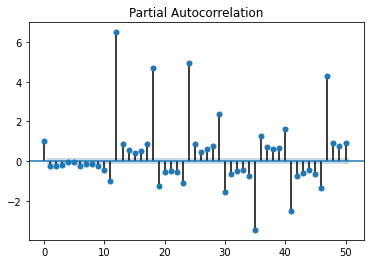

In [231]:
plot_pacf(df_sprk['Sparkling'].diff().dropna(),lags=50)
plt.show()

**Check for Stationality for train data set**

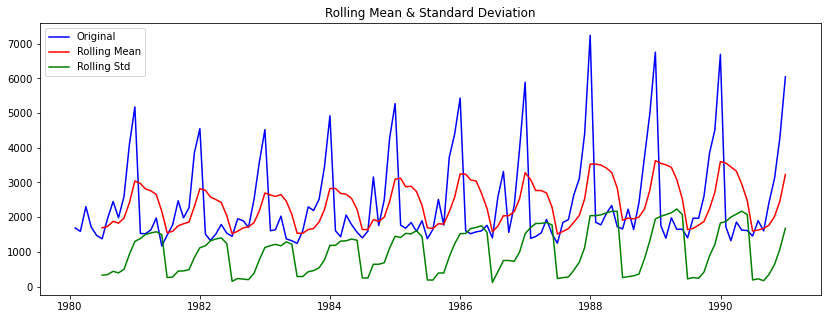

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [232]:
test_stationarity(train_sprk['Sparkling'])

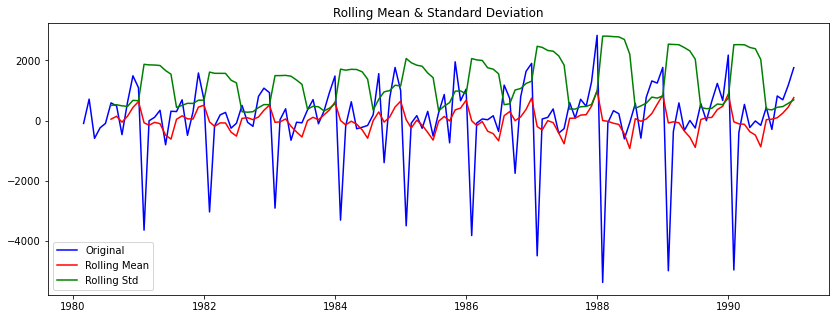

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [233]:
test_stationarity(train_sprk['Sparkling'].diff().dropna())

Train data set is stationary

# Rose.csv

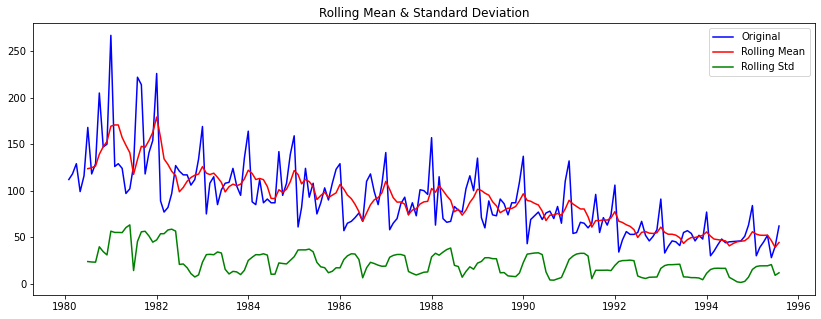

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [234]:
test_stationarity(df_rose['Rose'])

Null Hypothesis - Timeseries is not stationary

Alternate Hypothesis - Timeseries is stationary

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

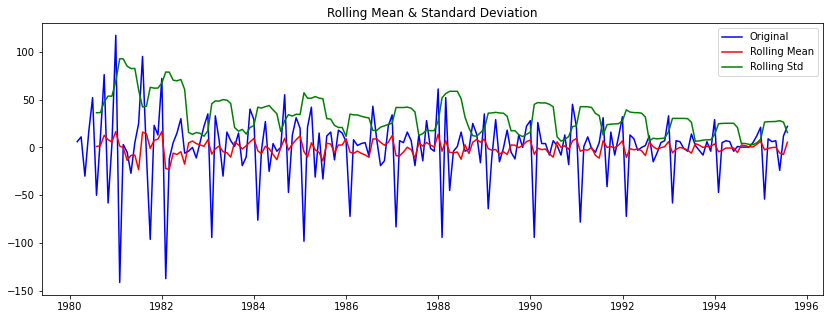

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [235]:
test_stationarity(df_rose['Rose'].diff().dropna())

We see that at 𝛼 = 0.05 the Time Series is stationary

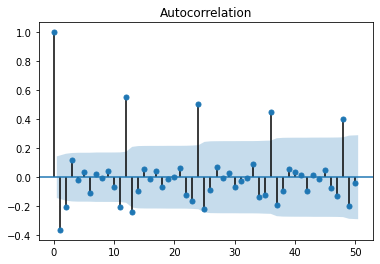

In [236]:
plot_acf(df_rose['Rose'].diff().dropna(),lags=50)
plt.show()

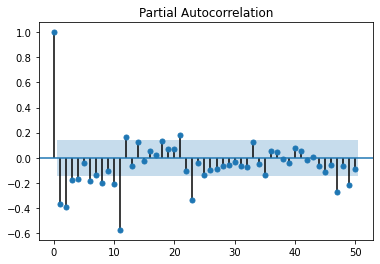

In [237]:
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50)
plt.show()

**Check stationality for train data set**

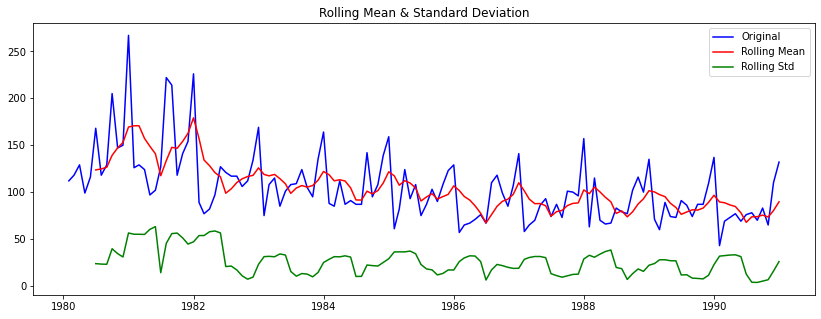

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [238]:
test_stationarity(train_rose['Rose'])

Train data set is not stationary at alpha = 0.05.

So we will use order of difference 1 and check the stationarity

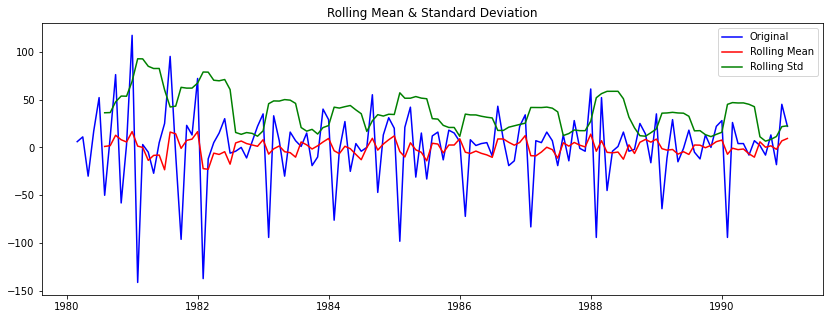

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [239]:
test_stationarity(train_rose['Rose'].diff().dropna())

At order of 1 difference train data set is Stationary

# 6.	Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

•	I have used both ARIMA and SARIMA model here. Ideally ARIMA is used where there is no seasonality and SARIMA used where there is seasonality in the data.

•	In both Sparkling and Rose data set there is additive seasonality available, so ideally, we should be using SARIMA.  But just for learning purpose here have built both the model.

•	The best combination of p, q and d value have built by iterating the values and identifying the lowest AIC.

•	AIC meaning is the loss of information. The lower the value the better is result.

•	Here using function itertools and given p and q value will range from 0 to 4 and d value will be 1.

•	As we have seen in above question 5 that in order of difference 1, the data is stationary so will take d value is 1 to use the Stationary data for building ARIMA/SARIMA model for both Sparkling and Rose dataset.


# Spakling.csv

**ARIMA**

In [240]:
import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [241]:
#Empty Data Frame
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [243]:
from statsmodels.tsa.arima_model import ARIMA

In [244]:
for param in pdq:
    try:
        ARIMA_model = ARIMA(train_sprk['Sparkling'].values,order=param).fit()
        print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
        ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    except:
        continue

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064376843794
ARIMA(0, 1, 2) - AIC:2232.7830976840546
ARIMA(0, 1, 3) - AIC:2233.0166051370875


C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(0, 1, 4) - AIC:2233.8017181407595
ARIMA(1, 1, 0) - AIC:2268.5280607731743
ARIMA(1, 1, 1) - AIC:2235.013945349683
ARIMA(1, 1, 2) - AIC:2233.5976471190347
ARIMA(1, 1, 3) - AIC:2234.574141545822
ARIMA(2, 1, 0) - AIC:2262.035600271052
ARIMA(2, 1, 1) - AIC:2232.3604898792064


C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 1, 2) - AIC:2210.616489596636


C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 1, 3) - AIC:2229.3580937708066
ARIMA(2, 1, 4) - AIC:2220.220499139474
ARIMA(3, 1, 0) - AIC:2259.471554713157
ARIMA(3, 1, 1) - AIC:2233.9217601551263


C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 1, 2) - AIC:2228.9277372632782


C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 1, 3) - AIC:2225.661558524897
ARIMA(3, 1, 4) - AIC:2226.0548557570232
ARIMA(4, 1, 0) - AIC:2261.468154694377
ARIMA(4, 1, 1) - AIC:2235.131466031907
ARIMA(4, 1, 2) - AIC:2230.8967081974984
ARIMA(4, 1, 3) - AIC:2226.954554251464


In [245]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
11  (2, 1, 2)  2210.616490
13  (2, 1, 4)  2220.220499
17  (3, 1, 3)  2225.661559
18  (3, 1, 4)  2226.054856
22  (4, 1, 3)  2226.954554
16  (3, 1, 2)  2228.927737
12  (2, 1, 3)  2229.358094
21  (4, 1, 2)  2230.896708
10  (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
3   (0, 1, 3)  2233.016605
7   (1, 1, 2)  2233.597647
4   (0, 1, 4)  2233.801718
15  (3, 1, 1)  2233.921760
8   (1, 1, 3)  2234.574142
6   (1, 1, 1)  2235.013945
20  (4, 1, 1)  2235.131466
14  (3, 1, 0)  2259.471555
19  (4, 1, 0)  2261.468155
9   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906438
5   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [246]:
mod = ARIMA(train_sprk['Sparkling'], order=(2,1,2),freq='M')
results_Arima = mod.fit()
print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.308
Method:                       css-mle   S.D. of innovations           1011.769
Date:                Fri, 14 Jan 2022   AIC                           2210.616
Time:                        17:27:54   BIC                           2227.868
Sample:                    02-29-1980   HQIC                          2217.626
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5838      0.517     10.800      0.000       4.570       6.597
ar.L1.D.Sparkling     1.2697      0.074     17.044      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


**Model Evaluations**

In [247]:
predicted_arima = results_Arima.forecast(steps=len(test_sprk))

In [248]:
from sklearn.metrics import  mean_squared_error
test_rmse_arima = mean_squared_error(test_sprk['Sparkling'],predicted_arima[0],squared=False)
test_rmse_arima

1375.038179426197

In [249]:
mod1 = pd.DataFrame({'Test_Rmse': test_rmse_arima}
                           ,index=['Arima (2,1,2)'])
mod1

Test_Rmse
Arima (2,1,2)  1375.038179

In [250]:
final1=pd.concat([Final_Sparkling,mod1])
final1

Test_Rmse
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
Simple Average                                      1275.081804
2 point Trailing MA                                  813.400684
4 point Trailing MA                                 1156.589694
6 point Trailing MA                                 1283.927428
9 point Trailing MA                                 1346.278315
Alpha = 0.0496_simple_exponential                   1316.034674
Alpha = 0.3_simple_exponential                      1935.507132
Alpha = 0.01_simple_exponential                     1276.251564
Alpha = 0.68, Beta = 9.999999999999999e-05_Doub...  2007.238526
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.11,Beta=0.03,Gamma=0.49,TripleExponenti...   473.954411
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...   317.553880
Arima (2,1,2)                                       1375.038179

**SARIMA**

In [251]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [252]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [253]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        try:
            SARIMA_model = sm.tsa.statespace.SARIMAX(train_sprk['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
            SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        except:
            continue

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616845524
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.153364023761
SARIMA(0, 1, 0)x(0, 0, 3, 12)7 - AIC:7262.919872255712
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389138
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791862
SARIMA(0, 1, 0)x(1, 0, 3, 12)7 - AIC:2687.0483834518463
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158601013
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920788
SARIMA(0, 1, 0)x(2, 0, 3, 12)7 - AIC:2972.004663799013
SARIMA(0, 1, 0)x(3, 0, 0, 12)7 - AIC:1467.4574095308403
SARIMA(0, 1, 0)x(3, 0, 1, 12)7 - AIC:1469.1871052625872
SARIMA(0, 1, 0)x(3, 0, 2, 12)7 - AIC:1471.0594530064832
SARIMA(0, 1, 0)x(3, 0, 3, 12)7 - AIC:2246.8677548676255
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649566

SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:1792.8234289791226
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:1740.0911247910585
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:1571.9888279565462
SARIMA(2, 1, 1)x(1, 0, 3, 12)7 - AIC:5152.166284449064
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:1577.1235060897284
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:1573.1595850538324
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:1572.3428650475662
SARIMA(2, 1, 1)x(2, 0, 3, 12)7 - AIC:1978.8151817387097
SARIMA(2, 1, 1)x(3, 0, 0, 12)7 - AIC:1402.4673327850585
SARIMA(2, 1, 1)x(3, 0, 1, 12)7 - AIC:1403.1307583978808
SARIMA(2, 1, 1)x(3, 0, 2, 12)7 - AIC:1403.8241380229879
SARIMA(2, 1, 1)x(3, 0, 3, 12)7 - AIC:2484.9220762519067
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:2176.8681149248987
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:1892.2372627285965
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:1661.5523433040703
SARIMA(2, 1, 2)x(0, 0, 3, 12)7 - AIC:7119.695315123298
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1757.2140935119176
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1725.60860507

In [254]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497475
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788332
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602642
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681484
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195908

In [255]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train_sprk['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 0, [], 12)   Log Likelihood                -683.749
Date:                             Fri, 14 Jan 2022   AIC                           1387.497
Time:                                     17:52:40   BIC                           1412.715
Sample:                                          0   HQIC                          1397.676
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6750      0.142    -11.792      0.000      -1.953      -1.397
ar.L2         -0.7442      

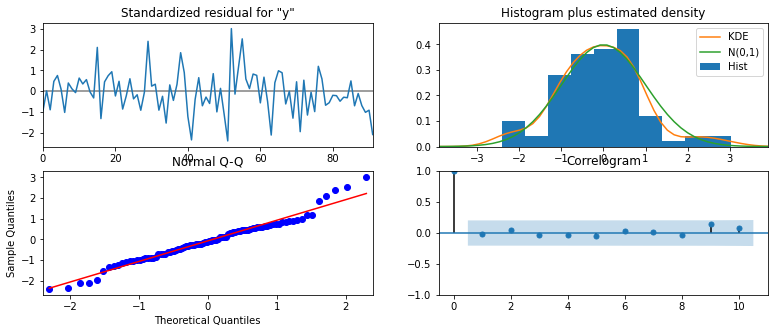

In [256]:
results_SARIMA.plot_diagnostics(figsize=(13, 5))
plt.show()

**Model Evaluation**

In [257]:
predicted_auto_SARIMA = results_SARIMA.get_forecast(steps=len(test_sprk))

In [258]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1343.157574  395.243392     568.494761    2117.820388
1  1351.546966  419.967050     528.426674    2174.667258
2  1579.494906  421.552955     753.266296    2405.723516
3  1668.658855  433.048528     819.899336    2517.418373
4  1321.543184  433.080539     472.720926    2170.365443

In [259]:
rmse = mean_squared_error(test_sprk['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

609.7343440159964


In [260]:
mod2 = pd.DataFrame({'Test_Rmse': rmse}
                           ,index=['SARIMA:param(3, 1, 3)sesonal:(3, 0, 0, 12)'])
mod2

Test_Rmse
SARIMA:param(3, 1, 3)sesonal:(3, 0, 0, 12)  609.734344

In [261]:
final2=pd.concat([final1,mod2])
final2

Test_Rmse
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
Simple Average                                      1275.081804
2 point Trailing MA                                  813.400684
4 point Trailing MA                                 1156.589694
6 point Trailing MA                                 1283.927428
9 point Trailing MA                                 1346.278315
Alpha = 0.0496_simple_exponential                   1316.034674
Alpha = 0.3_simple_exponential                      1935.507132
Alpha = 0.01_simple_exponential                     1276.251564
Alpha = 0.68, Beta = 9.999999999999999e-05_Doub...  2007.238526
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.11,Beta=0.03,Gamma=0.49,TripleExponenti...   473.954411
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...   317.553880
Arima (2,1,2)                                       1375.038179
SARIMA:param(3, 1, 3)sesonal:(3, 0, 0, 12)           609.734344

# Rose.csv

**ARIMA**

In [262]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [263]:
for param in pdq:
    try:
        ARIMA_model = ARIMA(train_rose['Rose'].values,order=param).fit()
        print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
        ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    except:
        continue

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464226
ARIMA(0, 1, 2) - AIC:1276.8353736830445
ARIMA(0, 1, 3) - AIC:1278.0742551997291
ARIMA(1, 1, 0) - AIC:1319.3483105806022
ARIMA(1, 1, 1) - AIC:1277.7757500733142
ARIMA(1, 1, 2) - AIC:1277.359222960877
ARIMA(1, 1, 3) - AIC:1279.312636832397
ARIMA(2, 1, 0) - AIC:1300.609261174395
ARIMA(2, 1, 1) - AIC:1279.0456894093109
ARIMA(2, 1, 2) - AIC:1279.298693936587
ARIMA(2, 1, 3) - AIC:1281.196226042356
ARIMA(3, 1, 0) - AIC:1299.478739154306
ARIMA(3, 1, 1) - AIC:1279.6059622133976
ARIMA(3, 1, 2) - AIC:1280.9692502911253
ARIMA(3, 1, 3) - AIC:1273.1940997023457


C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [264]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
15  (3, 1, 3)  1273.194100
2   (0, 1, 2)  1276.835374
6   (1, 1, 2)  1277.359223
5   (1, 1, 1)  1277.775750
3   (0, 1, 3)  1278.074255
9   (2, 1, 1)  1279.045689
10  (2, 1, 2)  1279.298694
7   (1, 1, 3)  1279.312637
13  (3, 1, 1)  1279.605962
1   (0, 1, 1)  1280.726183
14  (3, 1, 2)  1280.969250
11  (2, 1, 3)  1281.196226
12  (3, 1, 0)  1299.478739
8   (2, 1, 0)  1300.609261
4   (1, 1, 0)  1319.348311
0   (0, 1, 0)  1335.152658

In [265]:
mod = ARIMA(train_rose['Rose'], order=(3,1,3),freq='M')

In [266]:
results_Arima = mod.fit()

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [267]:
print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Fri, 14 Jan 2022   AIC                           1273.194
Time:                        18:00:12   BIC                           1296.196
Sample:                    02-29-1980   HQIC                          1282.541
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7242      0.086     -8.401      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7217      0.087     -8.33

**Evaluations**

In [268]:
predicted_arima = results_Arima.forecast(steps=len(test_rose))

In [269]:
from sklearn.metrics import  mean_squared_error
test_rmse_arima = mean_squared_error(test_rose['Rose'],predicted_arima[0],squared=False)
test_rmse_arima

15.987381555612421

In [270]:
mod12 = pd.DataFrame({'Test_Rmse': test_rmse_arima}
                           ,index=['Arima (3,1,3)'])
mod12

Test_Rmse
Arima (3,1,3)  15.987382

In [271]:
final_rose1=pd.concat([Final_rose,mod12])

In [272]:
final_rose1

Test_Rmse
RegressionOnTime                                     15.268955
NaiveModel                                           79.718773
Simple Average                                       53.460570
2 point Trailing MA                                  11.529278
4 point Trailing MA                                  14.451403
6 point Trailing MA                                  14.566327
9 point Trailing MA                                  14.727630
Alpha=0.098749_simple_exponential                    36.796242
Alpha=0.07_simple_exponential                        36.437144
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567594
Alpha=0.087,Beta=4.750,Gamma=0,TripleExponentia...   14.241476
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...   12.662475
Arima (3,1,3)                                        15.987382

**SARIMA**

In [273]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [274]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        try:
            SARIMA_model = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
            SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        except:
            continue

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207525
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380887
SARIMA(0, 1, 0)x(0, 0, 3, 12)7 - AIC:4069.590491204337
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869387507
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635751242
SARIMA(0, 1, 0)x(1, 0, 3, 12)7 - AIC:3449.108510116113
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697506
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945717
SARIMA(0, 1, 0)x(2, 0, 3, 12)7 - AIC:3857.4945406067486
SARIMA(0, 1, 0)x(3, 0, 0, 12)7 - AIC:850.7535403931053
SARIMA(0, 1, 0)x(3, 0, 1, 12)7 - AIC:851.7482702708401
SARIMA(0, 1, 0)x(3, 0, 2, 12)7 - AIC:850.5304136127602
SARIMA(0, 1, 0)x(3, 0, 3, 12)7 - AIC:3916.199160461069
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1098.5554825918325
SARI

SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:1052.9244471203592
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:916.2424912822561
SARIMA(2, 1, 1)x(1, 0, 3, 12)7 - AIC:3815.2502476371387
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:896.5181608169346
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:897.6399565369479
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:899.4835866280652
SARIMA(2, 1, 1)x(2, 0, 3, 12)7 - AIC:3515.0856973999075
SARIMA(2, 1, 1)x(3, 0, 0, 12)7 - AIC:785.3932600254797
SARIMA(2, 1, 1)x(3, 0, 1, 12)7 - AIC:787.3639258918005
SARIMA(2, 1, 1)x(3, 0, 2, 12)7 - AIC:787.0598886983305
SARIMA(2, 1, 1)x(3, 0, 3, 12)7 - AIC:3628.8810600723914
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:1253.9102116146705
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:1085.9643552598218
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:916.3258311112747
SARIMA(2, 1, 2)x(0, 0, 3, 12)7 - AIC:3394.8555624844657
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1073.2912713696685
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1044.1909353660901
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:907.6661488803637
S

In [275]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400285
238  (3, 1, 2)  (3, 0, 2, 12)  774.880935
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [276]:

import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Fri, 14 Jan 2022   AIC                            774.400
Time:                                         18:16:25   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

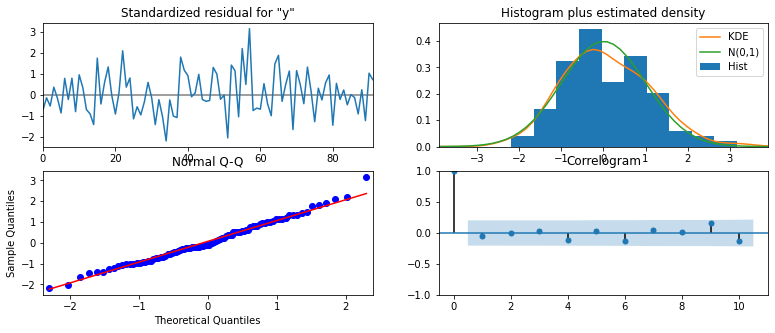

In [283]:
results_SARIMA.plot_diagnostics(figsize=(13, 5))
plt.show()

**Model Evaluations**

In [277]:
predicted_auto_SARIMA = results_SARIMA.get_forecast(steps=len(test_rose))

In [278]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  55.236018  13.908233      27.976381      82.495654
1  68.123466  13.991704      40.700229      95.546703
2  67.908824  14.012772      40.444296      95.373352
3  66.786253  14.100070      39.150624      94.421882
4  69.760151  14.109430      42.106176      97.414126

In [279]:
rmse = mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

18.882204036693544


In [280]:
mod13 = pd.DataFrame({'Test_Rmse': rmse}
                           ,index=['SARIMA:Parm=(3, 1, 1)seasonal=(3, 0, 2, 12)'])
mod13

Test_Rmse
SARIMA:Parm=(3, 1, 1)seasonal=(3, 0, 2, 12)  18.882204

In [281]:
final_rose2=pd.concat([final_rose1,mod13])
final_rose2

Test_Rmse
RegressionOnTime                                     15.268955
NaiveModel                                           79.718773
Simple Average                                       53.460570
2 point Trailing MA                                  11.529278
4 point Trailing MA                                  14.451403
6 point Trailing MA                                  14.566327
9 point Trailing MA                                  14.727630
Alpha=0.098749_simple_exponential                    36.796242
Alpha=0.07_simple_exponential                        36.437144
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567594
Alpha=0.087,Beta=4.750,Gamma=0,TripleExponentia...   14.241476
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...   12.662475
Arima (3,1,3)                                        15.987382
SARIMA:Parm=(3, 1, 1)seasonal=(3, 0, 2, 12)          18.882204

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

**As there is seassonality ideally we should be using SARIMA. But just for learning used both ARIMA and SARIMA.**

# Sparkling.csv

**Plot ACF anf PACF plot**

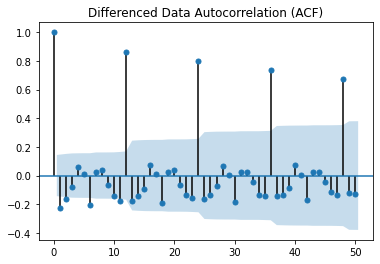

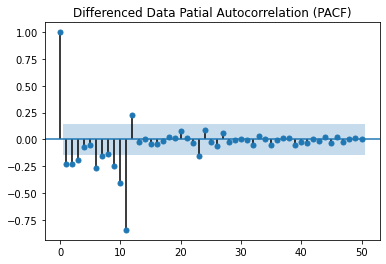

In [282]:
plot_acf(df_sprk['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation (ACF)')
plot_pacf(df_sprk['Sparkling'].diff().dropna(),lags=50,method = 'ywmle',title='Differenced Data Patial Autocorrelation (PACF)')
plt.show()

Lag0 should never be counted because a series always 100% correlated with itself at lag0.

We will count the significant lag which means any lag outside of the blue zone (confidence level) by excluding the 0 lag.

Observing the ACF plot, it cut offs after 2 lags. so q = 2

Observing the PACF plot, the lags are getting cut offs after 3 lags. so can consider p = 3 which are significant.

And as at 1 order of difference data is stationary. 

So the cut off parameter is (3,1,2) for order.

For seasonal order: (P,D,Q)s =  (1, 1, 4, 12)

P - No of seasonal AR terms = 1

Need to check at lag 12, 24, 36 and 48 how many is out of the confidence interval area in PACF plot. In case of positive result, need to add 1 term for Seasonal AR. In the PACF plot above, we can see that the value at lag 12 is out of the blue area of the confidence interval, so we will add 1 term. Now if we check the seasonal lag at 24 or 36 or 48 are inside the blue zone.It means P = 1 now.

Q - No of seasonal MA terms = 4 because  we have significant correlation at lag 12, lag 24, 36 and 48 as per ACF

D - No of seasonal differences = 1 (If consistent seasonal pattern, then should use an order of seasonal differencing)

s - Lenght of season = 12

The seasonality point is at 12, 24, 36 and 48. So we can say seasonality lags in every 12 period. 

**ARIMA**

In [283]:
mod_new = ARIMA(train_sprk['Sparkling'].astype("double"), order=(3,1,2)) 
results_Arima_new = mod_new.fit()
print(results_Arima_new.summary())

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.202
Date:                Fri, 14 Jan 2022   AIC                           2228.928
Time:                        18:17:18   BIC                           2249.054
Sample:                    02-29-1980   HQIC                          2237.106
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9848      3.643      1.643      0.100      -1.156      13.126
ar.L1.D.Sparkling    -0.4420   9.72e-06  -4.55e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [284]:
predicted_arima_new = results_Arima_new.forecast(steps=len(test_sprk))
test_rmse_arima_new = mean_squared_error(test_sprk['Sparkling'],predicted_arima_new[0],squared=False)

In [285]:
mod14 = pd.DataFrame({'Test_Rmse': test_rmse_arima_new}
                           ,index=['Cut_Off_Arima (3,1,2)'])
mod14

Test_Rmse
Cut_Off_Arima (3,1,2)  1379.043029

In [286]:
final3=pd.concat([final2,mod14])
final3

Test_Rmse
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
Simple Average                                      1275.081804
2 point Trailing MA                                  813.400684
4 point Trailing MA                                 1156.589694
6 point Trailing MA                                 1283.927428
9 point Trailing MA                                 1346.278315
Alpha = 0.0496_simple_exponential                   1316.034674
Alpha = 0.3_simple_exponential                      1935.507132
Alpha = 0.01_simple_exponential                     1276.251564
Alpha = 0.68, Beta = 9.999999999999999e-05_Doub...  2007.238526
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.11,Beta=0.03,Gamma=0.49,TripleExponenti...   473.954411
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...   317.553880
Arima (2,1,2)                                       1375.038179
SARIMA:param(3, 1, 3)sesonal:(3, 0, 0, 12)           609.734344
Cut_Off_Arima (3,1,2)                               1379.043029

**SARIMA**

In [287]:
import statsmodels.api as sm
mod_sar = sm.tsa.statespace.SARIMAX(train_sprk['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 1, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_new = mod_sar.fit(maxiter=1000)
print(results_SARIMA_new.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                             y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 1, [1, 2, 3, 4], 12)   Log Likelihood                -507.999
Date:                                       Fri, 14 Jan 2022   AIC                           1037.998
Time:                                               18:17:57   BIC                           1062.412
Sample:                                                    0   HQIC                          1047.671
                                                       - 132                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4905     

In [288]:
pred_test_SARIMA_new = results_SARIMA_new.get_forecast(steps=len(test_sprk))

In [289]:
test_rmse_sarima_new = mean_squared_error(test_sprk['Sparkling'],pred_test_SARIMA_new.predicted_mean,squared=False)

In [290]:
mod15 = pd.DataFrame({'Test_Rmse': test_rmse_sarima_new}
                           ,index=['Cut_Off_SARIMA:parm(3, 1, 2)sesonal:(1, 1, 4, 12)'])
mod15

Test_Rmse
Cut_Off_SARIMA:parm(3, 1, 2)sesonal:(1, 1, 4, 12)  324.896294

In [291]:
final4=pd.concat([final3,mod15])
final4

Test_Rmse
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
Simple Average                                      1275.081804
2 point Trailing MA                                  813.400684
4 point Trailing MA                                 1156.589694
6 point Trailing MA                                 1283.927428
9 point Trailing MA                                 1346.278315
Alpha = 0.0496_simple_exponential                   1316.034674
Alpha = 0.3_simple_exponential                      1935.507132
Alpha = 0.01_simple_exponential                     1276.251564
Alpha = 0.68, Beta = 9.999999999999999e-05_Doub...  2007.238526
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.11,Beta=0.03,Gamma=0.49,TripleExponenti...   473.954411
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...   317.553880
Arima (2,1,2)                                       1375.038179
SARIMA:param(3, 1, 3)sesonal:(3, 0, 0, 12)           609.734344
Cut_Off_Arima (3,1,2)                               1379.043029
Cut_Off_SARIMA:parm(3, 1, 2)sesonal:(1, 1, 4, 12)    324.896294

# Rose.csv

**PLOT ACF AND PACF**

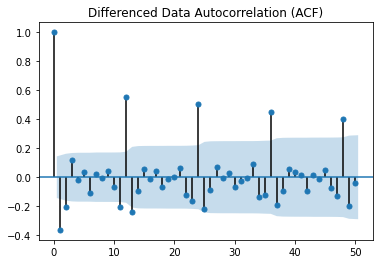

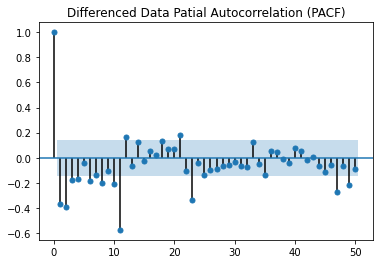

In [292]:
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation (ACF)')
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation (PACF)')
plt.show()

Lag0 should never be counted because a series always 100% correlated with itself at lag0.

We will count the significant lag which means any lag outside of the blue zone (confidence level) by excluding the 0 lag.

Observing the ACF plot, it cut offs after 2 lags. so q = 2

Observing the PACF plot, the lags are getting cut offs after 4 lags. so can consider p = 4 which are significant.

And as at 1 order of difference data is stationary.

So the cut off parameter is (4,1,2) for order.

For seasonal order: (P,D,Q)s = (1, 1, 4, 12)

P - No of seasonal AR terms = 1

Need to check at lag 12, 24, 36 and 48 how many is out of the confidence interval area. In case of positive result, need to add 1 term for Seasonal AR. In the PACF plot above, we can see that the value at lag 12 is out of the blue area of the confidence interval, so we will add 1 term. Now if we check the seasonal lag at 24 or 36 or 48 are inside the blue zone. It means P = 1 now.

Q - No of seasonal MA terms = 4 because we have significant correlation at lag 12, lag 24, 36 and 48 as per ACF

D - No of seasonal differences = 1

s - Lenght of season = 12

The seasonality point is at 12, 24, 36 and 48. So we can say seasonality lags in every 12 period.

In [293]:
mod_new = ARIMA(train_rose['Rose'], order=(4,1,2),freq='M') 
results_Arima_new = mod_new.fit()
print(results_Arima_new.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Fri, 14 Jan 2022   AIC                           1283.753
Time:                        18:22:52   BIC                           1306.754
Sample:                    02-29-1980   HQIC                          1293.099
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.69

C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [294]:
predicted_arima_new = results_Arima_new.forecast(steps=len(test_rose))
test_rmse_arima_new = mean_squared_error(test_rose['Rose'],predicted_arima_new[0],squared=False)


In [295]:
mod15 = pd.DataFrame({'Test_Rmse': test_rmse_arima_new}
                           ,index=['Cut_Off_Arima:Param=4,1,2'])
mod15

Test_Rmse
Cut_Off_Arima:Param=4,1,2  33.949732

In [296]:
final_rose3=pd.concat([final_rose2,mod15])
final_rose3

Test_Rmse
RegressionOnTime                                     15.268955
NaiveModel                                           79.718773
Simple Average                                       53.460570
2 point Trailing MA                                  11.529278
4 point Trailing MA                                  14.451403
6 point Trailing MA                                  14.566327
9 point Trailing MA                                  14.727630
Alpha=0.098749_simple_exponential                    36.796242
Alpha=0.07_simple_exponential                        36.437144
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567594
Alpha=0.087,Beta=4.750,Gamma=0,TripleExponentia...   14.241476
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...   12.662475
Arima (3,1,3)                                        15.987382
SARIMA:Parm=(3, 1, 1)seasonal=(3, 0, 2, 12)          18.882204
Cut_Off_Arima:Param=4,1,2                            33.949732

**SARIMA**

In [297]:
import statsmodels.api as sm

mod_sar = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(1, 1, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_new = mod_sar.fit(maxiter=1000)
print(results_SARIMA_new.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                             y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(1, 1, [1, 2, 3, 4], 12)   Log Likelihood                -280.159
Date:                                       Fri, 14 Jan 2022   AIC                            584.317
Time:                                               18:23:25   BIC                            610.951
Sample:                                                    0   HQIC                           594.870
                                                       - 132                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9184     

In [298]:
pred_test_SARIMA_new = results_SARIMA_new.get_forecast(steps=len(test_rose))
test_rmse_sarima_new = mean_squared_error(test_rose['Rose'],pred_test_SARIMA_new.predicted_mean,squared=False)
test_rmse_sarima_new

16.402243630850894

In [299]:
mod16 = pd.DataFrame({'Test_Rmse': test_rmse_sarima_new}
                           ,index=['CUTOFF_SARIMA:Param=(4, 1, 2)Seasonal=(1, 1, 4, 12)'])
mod16

Test_Rmse
CUTOFF_SARIMA:Param=(4, 1, 2)Seasonal=(1, 1, 4,...  16.402244

In [300]:
final_rose4=pd.concat([final_rose3,mod16])
final_rose4

Test_Rmse
RegressionOnTime                                     15.268955
NaiveModel                                           79.718773
Simple Average                                       53.460570
2 point Trailing MA                                  11.529278
4 point Trailing MA                                  14.451403
6 point Trailing MA                                  14.566327
9 point Trailing MA                                  14.727630
Alpha=0.098749_simple_exponential                    36.796242
Alpha=0.07_simple_exponential                        36.437144
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567594
Alpha=0.087,Beta=4.750,Gamma=0,TripleExponentia...   14.241476
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...   12.662475
Arima (3,1,3)                                        15.987382
SARIMA:Parm=(3, 1, 1)seasonal=(3, 0, 2, 12)          18.882204
Cut_Off_Arima:Param=4,1,2                            33.949732
CUTOFF_SARIMA:Param=(4, 1, 2)Seasonal=(1, 1, 4,...   16.402244

# 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

# Sparkling.csv

In [301]:
Test_Rmse=[1389.135175,3864.279352,1275.081804,813.400684,1156.589694,1283.927428,1346.278315,1316.034674,1935.507132,1276.251564,
          2007.238526,1778.564670,473.954411,317.553880,1375.038179,609.734344,1379.043029,324.896294]
parameters=['RegressionOnTime','NaiveModel','Simple Average','2 point Trailing MA','4 point Trailing MA','6 point Trailing MA',
            '9 point Trailing MA','Alpha = 0.0496','Alpha = 0.3','Alpha = 0.01','Alpha = 0.68,Beta = 9.999999999999999e-05',
            'Alpha=0.1,Beta=0.1',
           'Alpha=0.11,Beta=0.03,Gamma=0.49',
           'Alpha=0.03,Beta=0.03,Gamma=0.33',
           'Order=(2,1,2)','order=(3,1,3),sesonal=(3,0,0,12)',
            'Order=(3,1,2)','Order=(3,1,2),sesonal=(1,1,4,12)']
Final_Rmse_Values=(pd.DataFrame({'Parameters': parameters,'Test_RMSE': Test_Rmse},
            index=['Linear_Regression','Naive_Forecast','Simple_Average','Moving Average','Moving Average','Moving Average','Moving Average',
                   'Simple_Exponential_Smoothing','Simple_Exponential_Smoothing','Simple_Exponential_Smoothing','Double_Exponential_Smoothing','Double_exponential_Smoothing','Triple_Exponential_Smoothing','Triple_Exponential_Smoothing','ARIMA','SARIMA','CUT-OFF_ARIMA','CUT-OFF_SARIMA']))

Final_Rmse_Values.iloc[0:18,:] 

Parameters  \
Linear_Regression                                      RegressionOnTime   
Naive_Forecast                                               NaiveModel   
Simple_Average                                           Simple Average   
Moving Average                                      2 point Trailing MA   
Moving Average                                      4 point Trailing MA   
Moving Average                                      6 point Trailing MA   
Moving Average                                      9 point Trailing MA   
Simple_Exponential_Smoothing                             Alpha = 0.0496   
Simple_Exponential_Smoothing                                Alpha = 0.3   
Simple_Exponential_Smoothing                               Alpha = 0.01   
Double_Exponential_Smoothing  Alpha = 0.68,Beta = 9.999999999999999e-05   
Double_exponential_Smoothing                         Alpha=0.1,Beta=0.1   
Triple_Exponential_Smoothing            Alpha=0.11,Beta=0.03,Gamma=0.49   
Triple_Exponential_Smoothing            Alpha=0.03,Beta=0.03,Gamma=0.33   
ARIMA                                                     Order=(2,1,2)   
SARIMA                                 order=(3,1,3),sesonal=(3,0,0,12)   
CUT-OFF_ARIMA                                             Order=(3,1,2)   
CUT-OFF_SARIMA                         Order=(3,1,2),sesonal=(1,1,4,12)   

                                Test_RMSE  
Linear_Regression             1389.135175  
Naive_Forecast                3864.279352  
Simple_Average                1275.081804  
Moving Average                 813.400684  
Moving Average                1156.589694  
Moving Average                1283.927428  
Moving Average                1346.278315  
Simple_Exponential_Smoothing  1316.034674  
Simple_Exponential_Smoothing  1935.507132  
Simple_Exponential_Smoothing  1276.251564  
Double_Exponential_Smoothing  2007.238526  
Double_exponential_Smoothing  1778.564670  
Triple_Exponential_Smoothing   473.954411  
Triple_Exponential_Smoothing   317.553880  
ARIMA                         1375.038179  
SARIMA                         609.734344  
CUT-OFF_ARIMA                 1379.043029  
CUT-OFF_SARIMA                 324.896294

# Rose.csv

In [302]:
Test_Rmse=[15.268955,79.718773,53.460570,11.529278,14.451403,14.566327,14.727630,36.796242,36.437144,265.567594,14.241476,12.662475
          ,15.987382,18.882204,33.949732,16.402244]
parameters=['RegressionOnTime','NaiveModel','Simple Average','2 point Trailing MA','4 point Trailing MA','6 point Trailing MA','9 point Trailing MA',
            'Alpha=0.098749',
            'Alpha=0.7','Alpha=0.3,Beta=0.3',
           'Alpha=0.087,Beta=4.750,Gamma=0',
           'Alpha=0.3,Beta=0.3,Gamma=0.3',
           'Order=(3,1,3)','Order=(3,1,1)seasonal=(3,0,2,12)',
            'Order=(4,1,2)','Order=(4,1,2)Seasonal=(1,1,4,12)']
Final_Rmse_Values=(pd.DataFrame({'Parameters': parameters,'Test_RMSE': Test_Rmse},
            index=['Linear_Regression','Naive_Forecast','Simple_Average','Moving Average','Moving Average','Moving Average','Moving Average',
                   'Simple_Exponential_Smoothing','Simple_Exponential_Smoothing','Double_Exponential_Smoothing','Triple_Exponential_Smoothing','Triple_Exponential_Smoothing','ARIMA','SARIMA','CUT-OFF_ARIMA','CUT-OFF_SARIMA']))

Final_Rmse_Values.iloc[0:16,:] 

Parameters   Test_RMSE
Linear_Regression                             RegressionOnTime   15.268955
Naive_Forecast                                      NaiveModel   79.718773
Simple_Average                                  Simple Average   53.460570
Moving Average                             2 point Trailing MA   11.529278
Moving Average                             4 point Trailing MA   14.451403
Moving Average                             6 point Trailing MA   14.566327
Moving Average                             9 point Trailing MA   14.727630
Simple_Exponential_Smoothing                    Alpha=0.098749   36.796242
Simple_Exponential_Smoothing                         Alpha=0.7   36.437144
Double_Exponential_Smoothing                Alpha=0.3,Beta=0.3  265.567594
Triple_Exponential_Smoothing    Alpha=0.087,Beta=4.750,Gamma=0   14.241476
Triple_Exponential_Smoothing      Alpha=0.3,Beta=0.3,Gamma=0.3   12.662475
ARIMA                                            Order=(3,1,3)   15.987382
SARIMA                        Order=(3,1,1)seasonal=(3,0,2,12)   18.882204
CUT-OFF_ARIMA                                    Order=(4,1,2)   33.949732
CUT-OFF_SARIMA                Order=(4,1,2)Seasonal=(1,1,4,12)   16.402244

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

**Based on all the models what we have built we found that triple-exponential method is the most optimum model. So here we are building the triple exponential method on complete data set. and predicting on 12 months data into the future. we have calculated the upper and lower confidence bands at 95% confidence level**

**In rose_csv while considering the final model building, we should use Triple Exponential Smoothing because Moving Average is quite like Naïve Model and should not use in real time** 

**Smoothing techniques reduce the volatility in a data series, which allows analysts to identify important trends and place a higher weighting on recent data than on older data, they are more reactive to the latest changes. The moving average technique offers a simple way to smooth data; however, because it utilizes data from past time periods, it may obscure the latest changes in the trend**

# Sparkling.csv

In [314]:
fullmodel_sprk = ExponentialSmoothing(df_sprk['Sparkling'].astype("double"),trend='additive',seasonal='additive',freq='M').fit(
    smoothing_level=0.03,smoothing_slope=0.03,smoothing_seasonal=0.33)

In [315]:
RMSE_fullmodel_sprk = metrics.mean_squared_error(df_sprk['Sparkling'],fullmodel_sprk.fittedvalues,squared=False)
print('RMSE:',RMSE_fullmodel_sprk)

RMSE: 364.0751583414938


In [333]:
# Getting the predictions for the 12 months
prediction_sprk = fullmodel_sprk.forecast(steps=12)
prediction_sprk

1995-08-31    1938.336780
1995-09-30    2419.476358
1995-10-31    3280.986328
1995-11-30    3998.450717
1995-12-31    6164.403061
1996-01-31    1336.296446
1996-02-29    1621.454109
1996-03-31    1856.929355
1996-04-30    1826.032029
1996-05-31    1677.731489
1996-06-30    1605.037500
1996-07-31    2031.547147
Freq: M, dtype: float64

In [334]:
pred_sprk = pd.DataFrame({'prediction':prediction_sprk,
                          'lower_Ci':prediction_sprk - ((np.percentile(prediction_sprk,[2.5,97.5])))[0],
                          'upper_Ci': prediction_sprk + ((np.percentile(prediction_sprk,[2.5,97.5])))[1]})
pred_sprk.head()

prediction     lower_Ci      upper_Ci
1995-08-31  1938.336780   528.136544   7507.102946
1995-09-30  2419.476358  1009.276122   7988.242525
1995-10-31  3280.986328  1870.786092   8849.752495
1995-11-30  3998.450717  2588.250482   9567.216884
1995-12-31  6164.403061  4754.202825  11733.169228

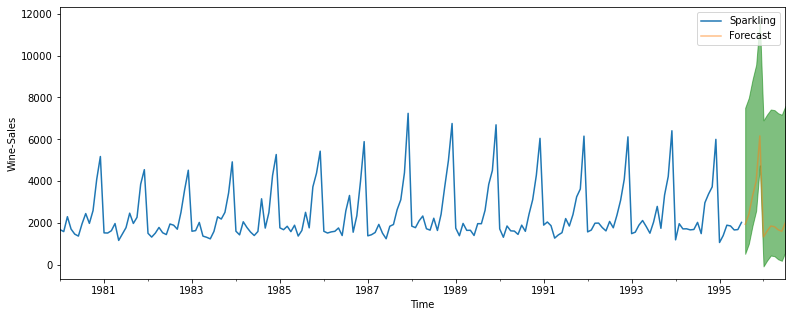

In [335]:
axis = df_sprk.plot(label='Actual TimeSeries', figsize=(13,5))
pred_sprk['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_sprk.index, pred_sprk['lower_Ci'], pred_sprk['upper_Ci'], color='g', alpha=0.5)
axis.set_xlabel('Time')
axis.set_ylabel('Wine-Sales')
plt.legend(loc='best')
plt.show()

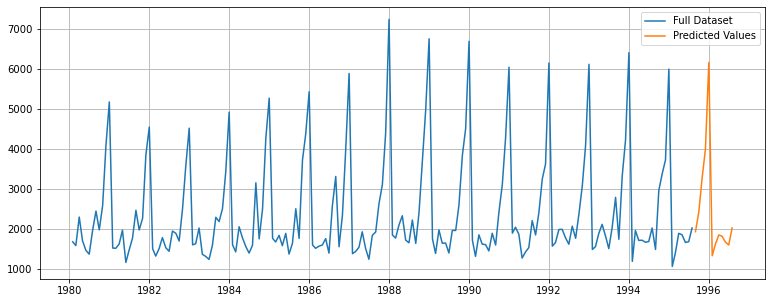

In [336]:
plt.figure(figsize=(13,5))
plt.plot(df_sprk['Sparkling'],label='Full Dataset')
plt.plot(prediction_sprk,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

# Rose.csv

In [318]:
fullmodel_rose = ExponentialSmoothing(df_rose['Rose'].astype("double"),trend='additive',seasonal='additive',freq='M').fit(
    smoothing_level=0.3,smoothing_slope=0.3,smoothing_seasonal=0.3)

In [321]:
RMSE_fullmodel_rose = metrics.mean_squared_error(df_rose['Rose'],fullmodel_rose.fittedvalues,squared=False)
print('RMSE:',RMSE_fullmodel_rose)

RMSE: 20.99059453056616


In [322]:
# Getting the predictions for the 12 months
prediction_rose = fullmodel_rose.forecast(steps=12)
prediction_rose

1995-08-31    40.457954
1995-09-30    41.038275
1995-10-31    44.341616
1995-11-30    55.190929
1995-12-31    86.387502
1996-01-31    29.943057
1996-02-29    39.201463
1996-03-31    46.634862
1996-04-30    49.137705
1996-05-31    38.150452
1996-06-30    46.118892
1996-07-31    50.833877
Freq: M, dtype: float64

In [347]:
pred_rose = pd.DataFrame({'prediction':prediction_rose,
                          'lower_Ci':prediction_rose - ((np.percentile(prediction_rose,[2.5,97.5])))[0],
                          'upper_Ci': prediction_rose + ((np.percentile(prediction_rose,[2.5,97.5])))[1]})
pred_rose.head()

prediction   lower_Ci    upper_Ci
1995-08-31   40.457954   8.257864  118.266399
1995-09-30   41.038275   8.838184  118.846720
1995-10-31   44.341616  12.141525  122.150060
1995-11-30   55.190929  22.990838  132.999373
1995-12-31   86.387502  54.187411  164.195946

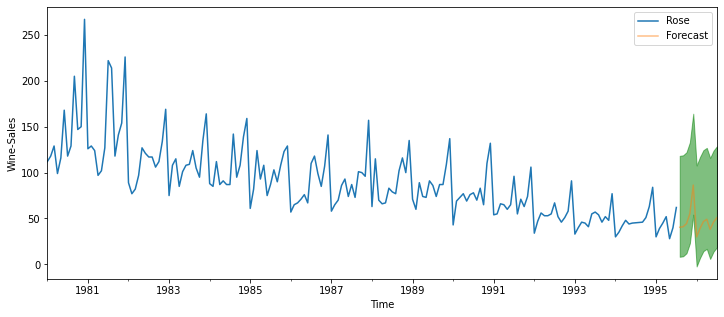

In [349]:
axis = df_rose.plot(label='Actual TimeSeries', figsize=(12,5))
pred_rose['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_rose.index, pred_rose['lower_Ci'], pred_rose['upper_Ci'], color='g', alpha=.5)
axis.set_xlabel('Time')
axis.set_ylabel('Wine-Sales')
plt.legend(loc='best')
plt.show()

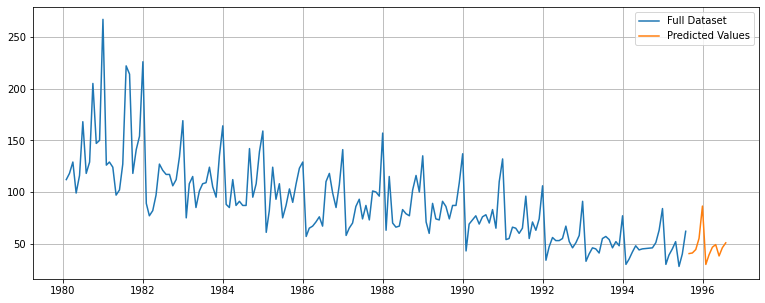

In [350]:
plt.figure(figsize=(13,5))
plt.plot(df_rose['Rose'],label='Full Dataset')
plt.plot(prediction_rose,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

# 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

# Sparkling.csv

Action:

•	Performed EDA and decomposition to find out the data patterns.

•	Did stationarity check and found in order of difference 1 data is stationary.

•	Created Box plot to check outliers, DistPlot to check skewness, barplot, line plot to check sale amounts.

•	Created various plot such as year plot, month plot, decade plot and quarter plot to analyze data behavior.

•	Built various models for forecasting and to find which model is most optimum.

•	Performed model building on train data and as well as on full data and forecasted future 12 months.

Insights:

•	More number of Wine sales happened on 1988. And less happened on 1994. 1995 is having data only up to July so not considering this year as less or more.

•	Triple Exponential Model is performing best because the model is giving the least error compared to others.

•	Looking at the bar plot, we can see that on December months the sales are highest. 

•	Looking at the future prediction, we can say that the sales figure will be more or less same as that of previous year. Hence some important measures have to be taken to increase the trend. As the trend has been more or less constant throughout the past years.

•	September to December month the sale increases for all the years. Basically during festive and winter season.

Resolution:

•	We can go back to find out the reasons  which push the higher sale on winter season. Is this because of cold weather or due to festive or both.

•	May increase the price of wine little higher as we already know what ever the condition customer will definitely buy the product which can be beneficial for the business. Because we have seen in each year wine sale is at peak during winter.

•	In other months can keep some discount so that customer will attract towards buying the product, the discount will not affect the business as during peak season price will be higher. So it will get adjusted.


# Rose.csv

Action:

•	Performed EDA and decomposition to find out the data patterns.

•	Did stationarity check and found in order of difference 1 data is stationary.

•	Created Box plot to check outliers, DistPlot to check skewness, barplot, line plot to check sale amounts.

•	Created various plot such as year plot, month plot, decade plot and quarter plot to analyze data behavior.

•	Built various models for forecasting and to find which model is most optimum.

•	Performed model building on train data and as well as on full data and forecasted future 12 months.

Insights:

•	1981 is having highest sale while the lowest is in 1994 is we take all months into account. Otherwise 1995 is having the least data, but possibility is because it has only up to July data present.

•	The highest sale is happening on December whereas lowest is in January. This is a trend for all the years. But need to find out with more reasons why January is least because it is also a new year season and chance of wine sale in general should be high. 

•	We will choose Triple Exponential Model as the most optimum model.

•	Looking at the analysis, we can say that the sales figure are declining each and every year.

•	Looking at the future prediction, we can say that the sales figure will be more or less same as that of previous year.


Resolutions:

•	Need to find more reasons why every year sale is declining is this because of quality issue or lack of advertisement.

•	To attract more customer can do more advertisement along with improved version of quality.

•	In January, new year season can offer good discount, so that people will get attracted to buy.

•	In December can increase the price little high to be more profitable as we know sale will remain high in December as per the past data.
